### Import Required Libraries

In [43]:
from pymatreader import read_mat
import matplotlib.pyplot as plt
import numpy
import scipy

### Load Dataset and Initialize

In [44]:
data = read_mat('150805.mat')

## Question 1 :

**Generate spikes according the firing rates of section a using:**

Part 1 : homogenous point process

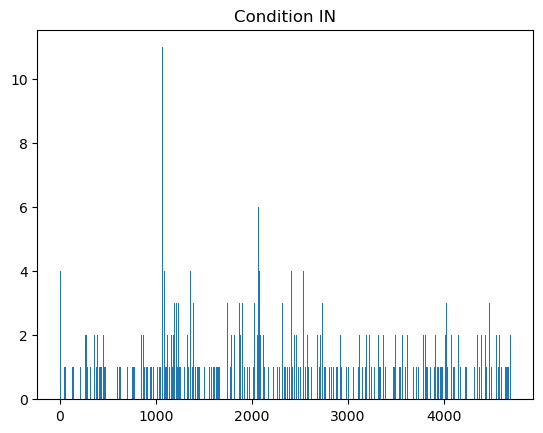

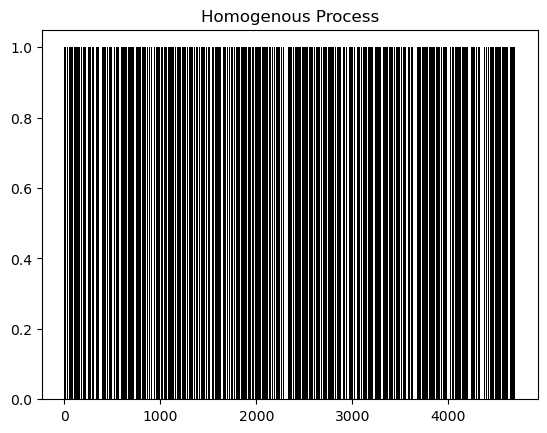

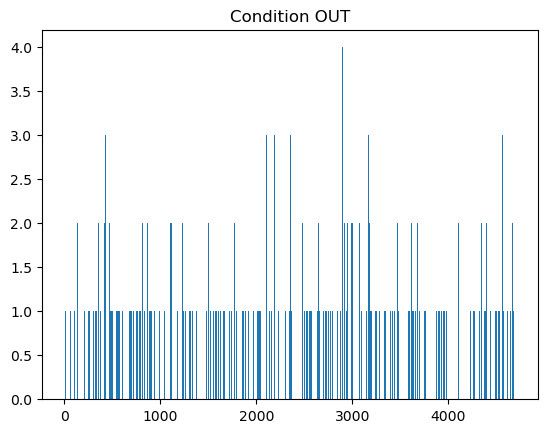

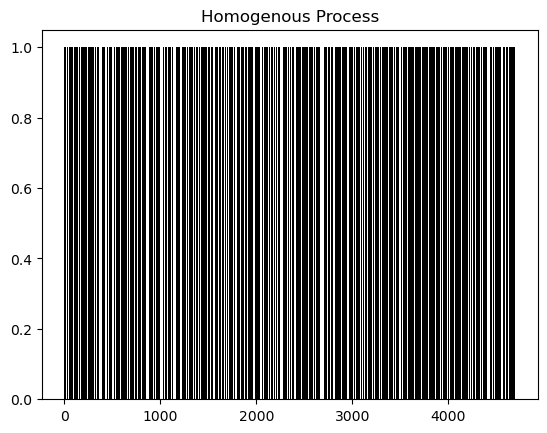

In [11]:
def Homogeneous(FR,shape):
    h=numpy.zeros((shape))
    rand = numpy.random.rand(shape)
    for i in range(shape):
        if rand[i] >= 0.2*FR:
            h[i] = 1 
        else:
            h[i] = 0
    return h

codes_5=data['Event']['mgs']['codes'][:,4] 
s_mgs_13=data['spike'][10][0]['mgs'] 
index_t_51= numpy.where(codes_5==51)[0]
index_t_54= numpy.where(codes_5==54)[0] 
psth_in=s_mgs_13[index_t_51,:]
psth_out=s_mgs_13[index_t_54,:] 
sum_psth_in=numpy.sum(psth_in,axis=0)
sum_psth_out=numpy.sum(psth_out,axis=0)
FR_in=numpy.sum(numpy.mean(psth_in,axis=0))/len(index_t_51) 
FR_out=numpy.sum(numpy.mean(psth_out,axis=0))/len(index_t_54) 
Homogeneous_in=Homogeneous(FR_in,psth_in.shape[1])
Homogeneous_out=Homogeneous(FR_out,psth_out.shape[1])

plt.figure(1)
x1=numpy.arange(len(sum_psth_in))
plt.bar(x1,sum_psth_in)
plt.title('Condition IN')
plt.figure(2)
x2=numpy.arange(len(Homogeneous_in))
plt.bar(x2,Homogeneous_in,color='k')
plt.title('Homogenous Process')
plt.figure(3)
x3=numpy.arange(len(sum_psth_out))
plt.bar(x3,sum_psth_out)
plt.title('Condition OUT')
plt.figure(4)
x4=numpy.arange(len(Homogeneous_out))
plt.bar(x4,Homogeneous_out,color='k')
plt.title('Homogenous Process')
plt.show()

Part 2 : Inhomogeneous point process

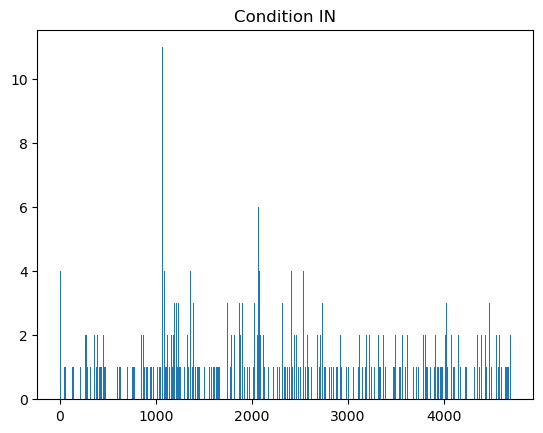

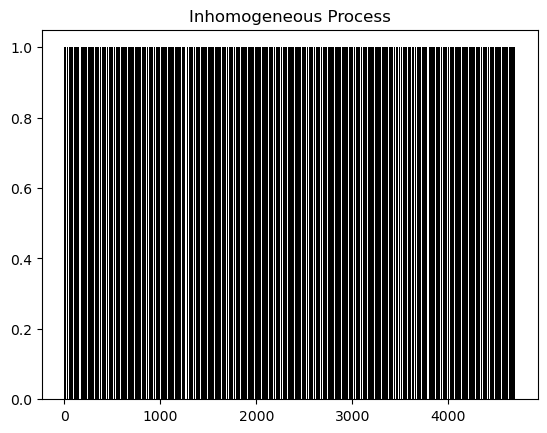

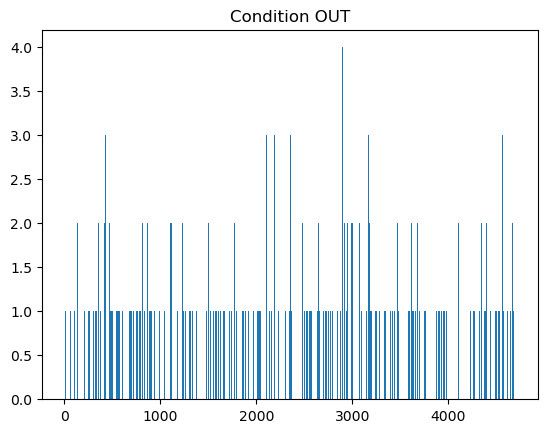

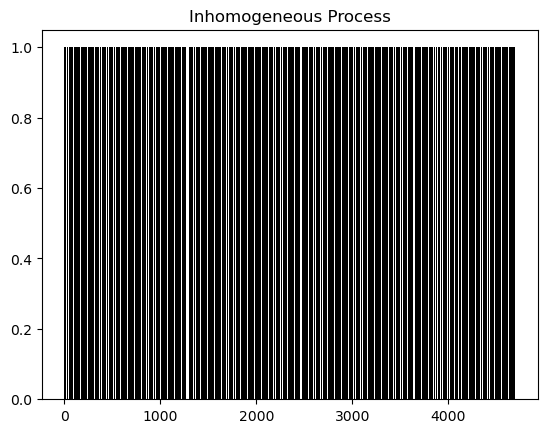

In [14]:
def Inhomogeneous(FR,shape):
    Inh=numpy.zeros((shape))
    rand = numpy.random.rand(shape)
    for i in range(shape):
        if rand[i] >= 0.2*FR[i]:
            Inh[i] = 1
        else:
            Inh[i] = 0
    return Inh

codes_5=data['Event']['mgs']['codes'][:,4] 
s_mgs_13=data['spike'][10][0]['mgs'] 
index_t_51= numpy.where(codes_5==51)[0] 
index_t_54= numpy.where(codes_5==54)[0] 
psth_in=s_mgs_13[index_t_51,:] 
psth_out=s_mgs_13[index_t_54,:] 
sum_psth_in=numpy.sum(psth_in,axis=0)
sum_psth_out=numpy.sum(psth_out,axis=0)
FR_in=numpy.zeros((s_mgs_13.shape[1]))
FR_in[0:9] = numpy.mean(psth_in[:,0:9],axis=0)
for i in range(10,s_mgs_13.shape[1]):
    FR_in[i] = numpy.sum(numpy.mean(psth_in[:,i-10:i],axis=0))
FR_out=numpy.zeros((s_mgs_13.shape[1]))
FR_out[0:9] = numpy.mean(psth_out[:,0:9],axis=0)
for i in range(10,s_mgs_13.shape[1]):
    FR_out[i] = numpy.sum(numpy.mean(psth_out[:,i-10:i],axis=0)) 
Inhomogeneous_in=Inhomogeneous(FR_in,psth_in.shape[1])
Inhomogeneous_out=Inhomogeneous(FR_out,psth_out.shape[1])

plt.figure(1)
x1=numpy.arange(len(sum_psth_in))
plt.bar(x1,sum_psth_in)
plt.title('Condition IN')
plt.figure(2)
x2=numpy.arange(len(Inhomogeneous_in))
plt.bar(x2,Inhomogeneous_in,color='k')
plt.title('Inhomogeneous Process')
plt.figure(3)
x3=numpy.arange(len(sum_psth_out))
plt.bar(x3,sum_psth_out)
plt.title('Condition OUT')
plt.figure(4)
x4=numpy.arange(len(Inhomogeneous_out))
plt.bar(x4,Inhomogeneous_out,color='k')
plt.title('Inhomogeneous Process')
plt.show()

Part 3 : Renewal process based on the time of last spike (use the time rescaling theory)

C:\Users\masou\AppData\Local\Temp\ipykernel_11112\1892285168.py:5: RuntimeWarning: divide by zero encountered in true_divide
  lambda_t = FR[i] * numpy.exp(-(t_last[i]-i)/FR[i])
C:\Users\masou\AppData\Local\Temp\ipykernel_11112\1892285168.py:5: RuntimeWarning: invalid value encountered in double_scalars
  lambda_t = FR[i] * numpy.exp(-(t_last[i]-i)/FR[i])
C:\Users\masou\AppData\Local\Temp\ipykernel_11112\1892285168.py:5: RuntimeWarning: overflow encountered in exp
  lambda_t = FR[i] * numpy.exp(-(t_last[i]-i)/FR[i])
C:\Users\masou\AppData\Local\Temp\ipykernel_11112\1892285168.py:5: RuntimeWarning: invalid value encountered in true_divide
  lambda_t = FR[i] * numpy.exp(-(t_last[i]-i)/FR[i])


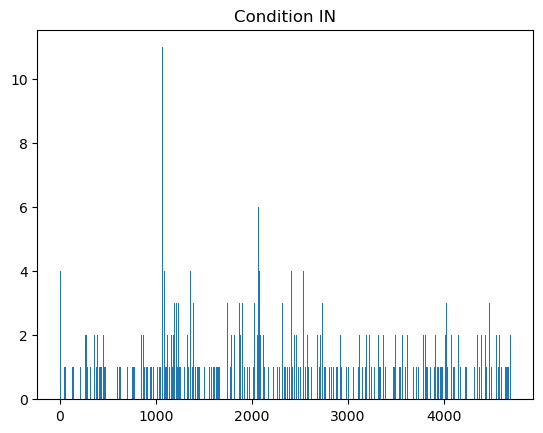

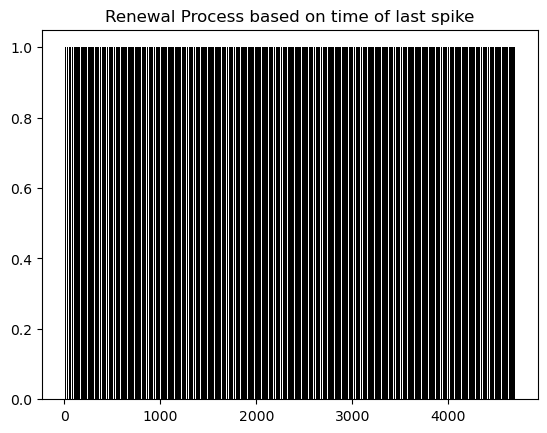

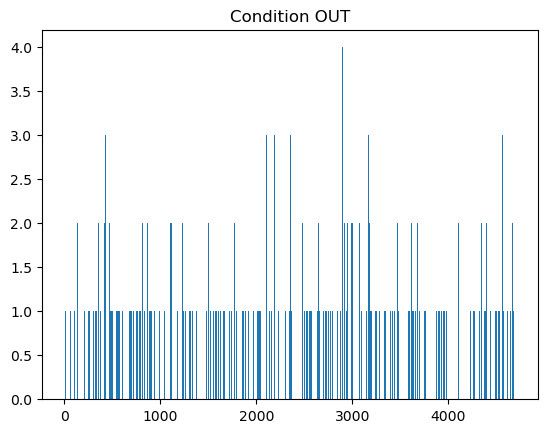

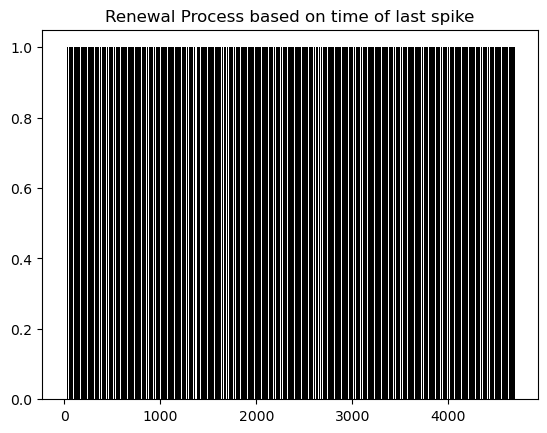

In [38]:
def Inhomogeneous_Rescale(FR, shape, t_last):
    Inh = numpy.zeros((shape))
    rand = numpy.random.rand(shape)
    for i in range(shape):
        lambda_t = FR[i] * numpy.exp(-(t_last[i]-i)/FR[i])
        if rand[i] < lambda_t:
            Inh[i] = 1
    return Inh
codes_5=data['Event']['mgs']['codes'][:,4] 
s_mgs_13=data['spike'][10][0]['mgs'] 
index_t_51= numpy.where(codes_5==51)[0] 
index_t_54= numpy.where(codes_5==54)[0] 
psth_in=s_mgs_13[index_t_51,:] 
psth_out=s_mgs_13[index_t_54,:] 
sum_psth_in=numpy.sum(psth_in,axis=0)
sum_psth_out=numpy.sum(psth_out,axis=0)
FR_in=numpy.zeros((s_mgs_13.shape[1]))
FR_in[0:9] = numpy.mean(psth_in[:,0:9],axis=0)
for i in range(10,s_mgs_13.shape[1]):
    FR_in[i] = numpy.sum(numpy.mean(psth_in[:,i-10:i],axis=0))
FR_out=numpy.zeros((s_mgs_13.shape[1]))
FR_out[0:9] = numpy.mean(psth_out[:,0:9],axis=0)
for i in range(10,s_mgs_13.shape[1]):
    FR_out[i] = numpy.sum(numpy.mean(psth_out[:,i-10:i],axis=0)) 
t_last_in = numpy.argmax(psth_in, axis=0)
t_last_out = numpy.argmax(psth_out, axis=0)
Inhomogeneous_rescale_in = Inhomogeneous_Rescale(FR_in, psth_in.shape[1], t_last_in)
Inhomogeneous_rescale_out = Inhomogeneous_Rescale(FR_out, psth_out.shape[1], t_last_out)

plt.figure(1)
x1=numpy.arange(len(sum_psth_in))
plt.bar(x1,sum_psth_in)
plt.title('Condition IN')
plt.figure(2)
x2=numpy.arange(len(Inhomogeneous_rescale_in))
plt.bar(x2,Inhomogeneous_rescale_in,color='k')
plt.title('Renewal Process based on time of last spike')
plt.figure(3)
x3=numpy.arange(len(sum_psth_out))
plt.bar(x3,sum_psth_out)
plt.title('Condition OUT')
plt.figure(4)
x4=numpy.arange(len(Inhomogeneous_rescale_out))
plt.bar(x4,Inhomogeneous_rescale_out,color='k')
plt.title('Renewal Process based on time of last spike')
plt.show()


Part 4 : What process explained the behavior of your selected neuron? Why?

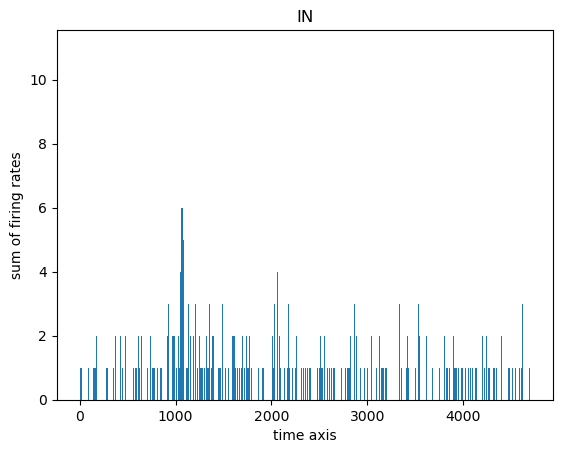

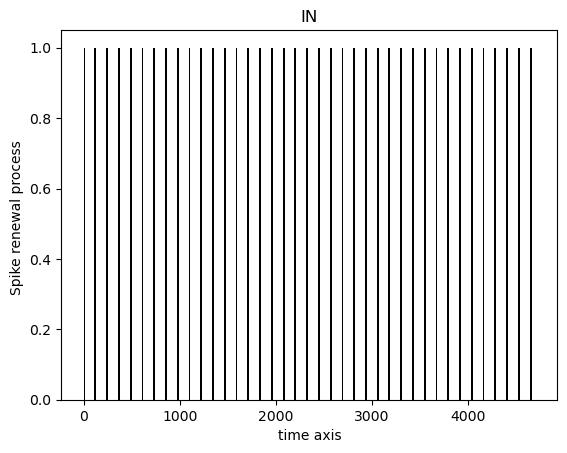

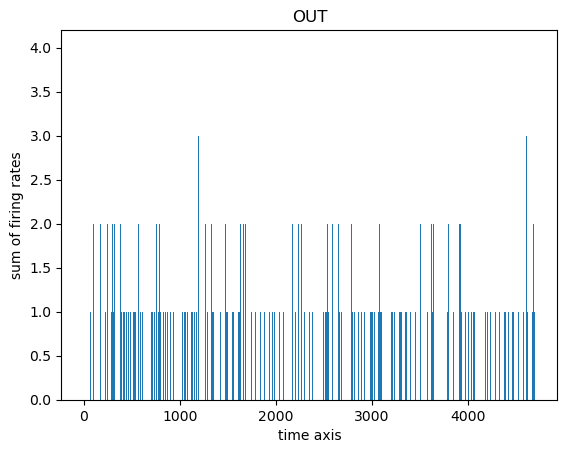

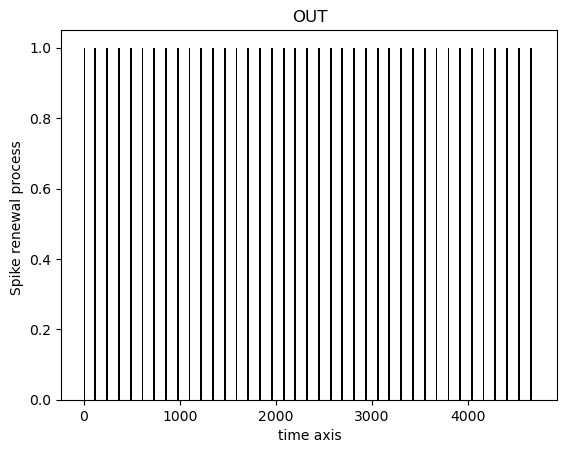

In [16]:
def Inhomogeneous(FR,shape):
    Inh=numpy.zeros((shape))
    rand = numpy.random.rand(shape) 
    for i in range(shape):
        if rand[i] >= 0.2*FR[i]:
            Inh[i] = 1 
        else:
            Inh[i] = 0
    return Inh

codes_5=data['Event']['mgs']['codes'][:,4]
s_mgs_13=data['spike'][10][0]['mgs'] 
index_t_51= numpy.where(codes_5==51)[0] 
index_t_54= numpy.where(codes_5==54)[0] 
psth_in=s_mgs_13[index_t_51,:] 
psth_out=s_mgs_13[index_t_54,:] 
sum_psth_in=numpy.sum(psth_in,axis=0)
sum_psth_out=numpy.sum(psth_out,axis=0)
FR_in=numpy.zeros((s_mgs_13.shape[1]))
FR_in[0:9] = numpy.mean(psth_in[:,0:9],axis=0)
for i in range(10,s_mgs_13.shape[1]):
    FR_in[i] = numpy.sum(numpy.mean(psth_in[:,i-10:i],axis=0)) 
FR_out=numpy.zeros((s_mgs_13.shape[1]))
FR_out[0:9] = numpy.mean(psth_out[:,0:9],axis=0)
for i in range(10,s_mgs_13.shape[1]):
    FR_out[i] = numpy.sum(numpy.mean(psth_out[:,i-10:i],axis=0))
Inhomogeneous_in=Inhomogeneous(FR_in,psth_in.shape[1])
Inhomogeneous_out=Inhomogeneous(FR_out,psth_out.shape[1])

Renewal_in = numpy.zeros((s_mgs_13.shape[1]))
Renewal_out = numpy.zeros((s_mgs_13.shape[1]))

step=5
for i in range(0,s_mgs_13.shape[1],step):
    if Inhomogeneous_in[i] == 1:
        Renewal_in[i] = 1
    if Inhomogeneous_out[i] == 1:
        Renewal_out[i] = 1

plt.figure(1)
x1=numpy.arange(len(sum_psth_in))
plt.bar(x1,sum_psth_in)
plt.xlabel('time axis')
plt.ylabel('sum of firing rates')
plt.title('IN')
plt.figure(2)
x2=numpy.arange(len(Renewal_in))
plt.bar(x2,Renewal_in,color='k')
plt.xlabel('time axis')
plt.ylabel('Spike renewal process ')
plt.title('IN')
plt.figure(3)
x3=numpy.arange(len(sum_psth_out))
plt.bar(x3,sum_psth_out)
plt.xlabel('time axis')
plt.ylabel('sum of firing rates')
plt.title('OUT')
plt.figure(4)
x4=numpy.arange(len(Renewal_out))
plt.bar(x4,Renewal_out,color='k')
plt.xlabel('time axis')
plt.ylabel('Spike renewal process ')
plt.title('OUT')
plt.show()

## Question 2 :

**You should select two neurons (one from MUA and one from SUA) and based on vodr structre (RF mapping task) answer the following questions:**

Part 1 : Create and plot receptive field of neuron using average firing rate.

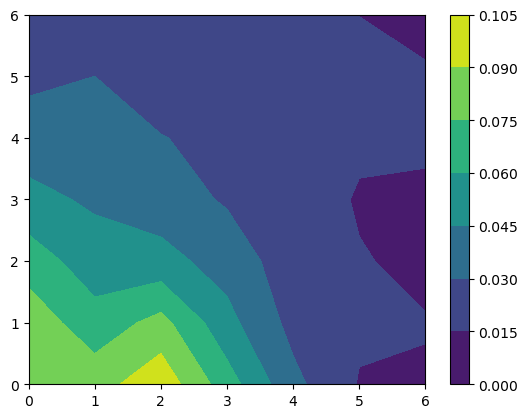

In [54]:
import scipy
import numpy as np 
import matplotlib.pyplot as plt
from scipy.io import loadmat

data = loadmat("150805.mat")
codes_5=data['Event'][0]['vodr'][0]['codes'][0][0][:,9:16]
s_mgs_13=data['spike'][10][0]['vodr'][0][0] 
Map = np.zeros((7,7,2)) 
pre_Sample = 30
for i in range(7):
    Sample = pre_Sample
    for j in range(7):
        Sample += 1
        for k in range(146):
            for l in range(7):
                if (codes_5[k,l] == Sample):
                    Map [i,j,0] = Map [i,j,0] + np.sum( s_mgs_13[k,160+(l*200):160+((l+1)*200)]) / 200 
                    Map [i,j,1] = Map [i,j,1] + 1 
        Map [i,j,0] = Map [i,j,0] / Map [i,j,1] 
    pre_Sample += 10

plt.contourf(Map[:,:,0])
plt.colorbar()
plt.show()

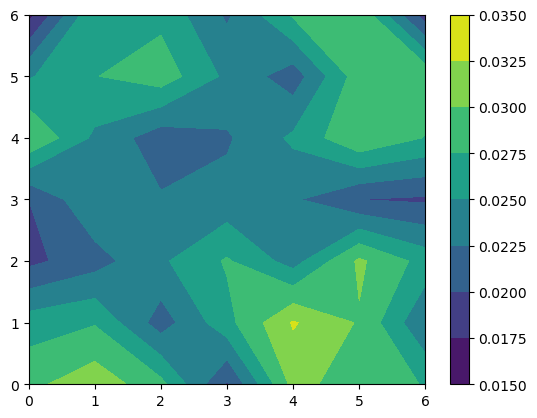

In [55]:
import scipy
import numpy as np 
import matplotlib.pyplot as plt
from scipy.io import loadmat

data = loadmat("150805.mat")
codes_5=data['Event'][0]['vodr'][0]['codes'][0][0][:,9:16]
s_mgs_13=data['spike'][14][1]['vodr'][0][0] 
Map = np.zeros((7,7,2)) 
pre_Sample = 30
for i in range(7):
    Sample = pre_Sample
    for j in range(7):
        Sample += 1
        for k in range(146):
            for l in range(7):
                if (codes_5[k,l] == Sample):
                    Map [i,j,0] = Map [i,j,0] + np.sum( s_mgs_13[k,160+(l*200):160+((l+1)*200)]) / 200 
                    Map [i,j,1] = Map [i,j,1] + 1 
        Map [i,j,0] = Map [i,j,0] / Map [i,j,1] 
    pre_Sample += 10

plt.contourf(Map[:,:,0])
plt.colorbar()
plt.show()

Part 2 : Using STA method to find the relation between stimulus and response. To do that attend to the following tips:

###### I.	You need to reconfigure your structure of data.
###### II.	Your stimulus is a 7*7 matrix (49 probes) at each time. At each time one of those 49 probes is 1 (the one is presented and you can find it in the condition column of the data) and the others are zero.
###### III.	You have to make a move for showing the STA.
###### IV.	Probably useful functions: plt.pcolormesh, plt.pause, colorbar, ...
###### V.	Using the following codes to find the place of a probe code in the 7*7 matrix:

 - column = math.floor(probecode / 10) - 2
 - row    = probecode % ((column + 2) * 10)
 - example: probecode = 64 : column = 4, row = 4


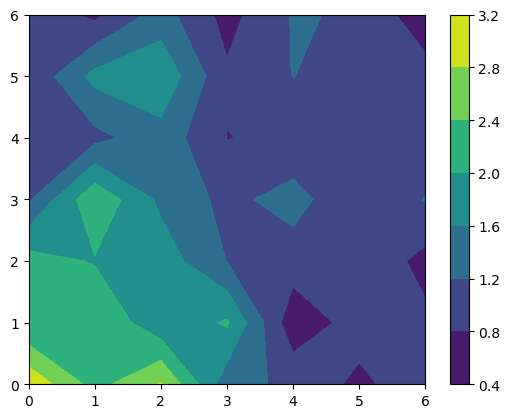

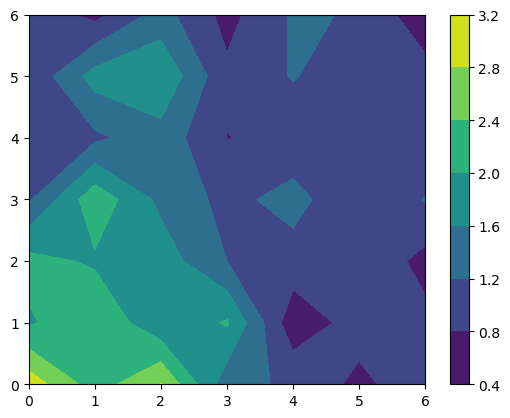

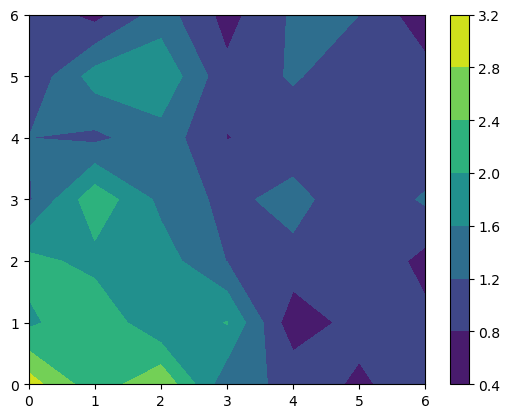

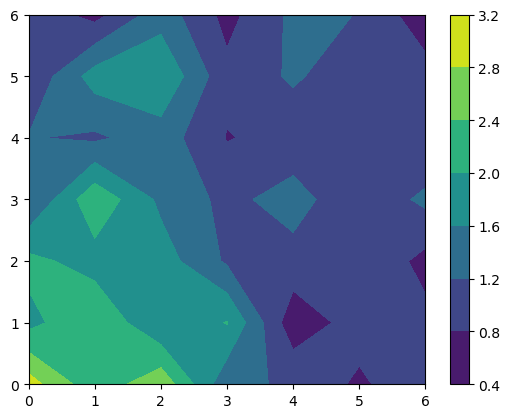

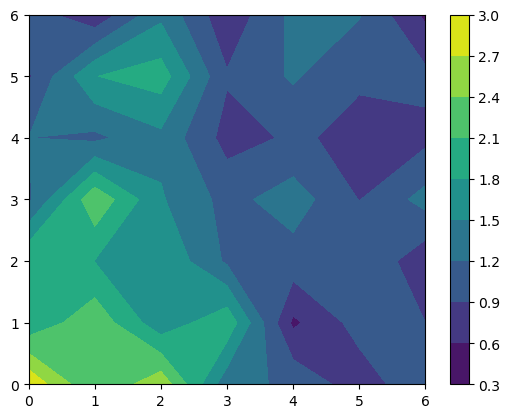

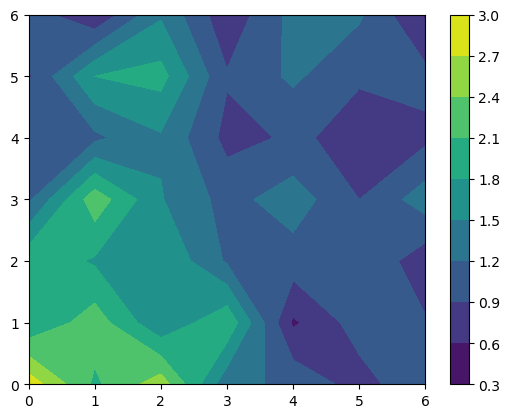

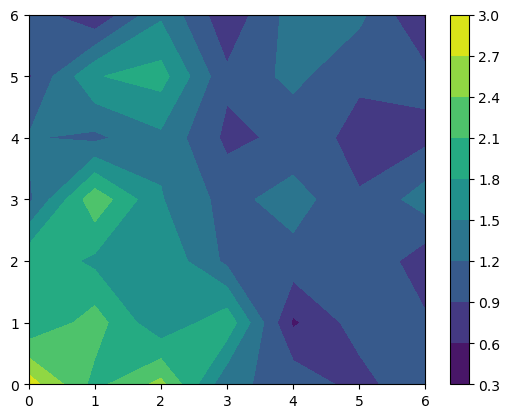

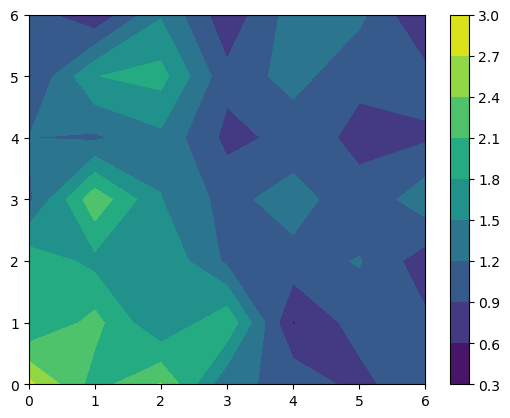

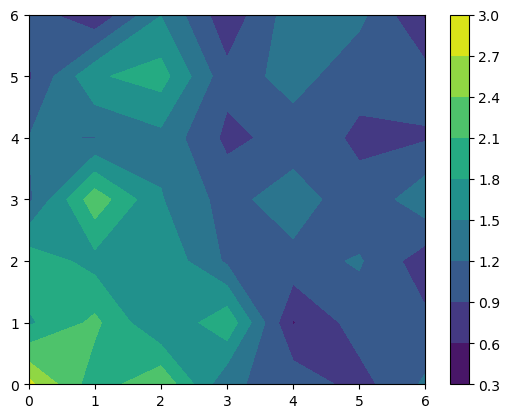

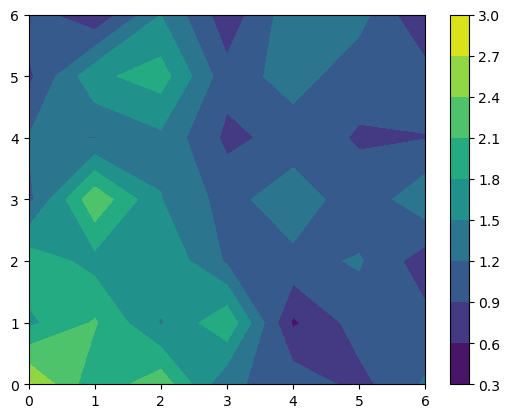

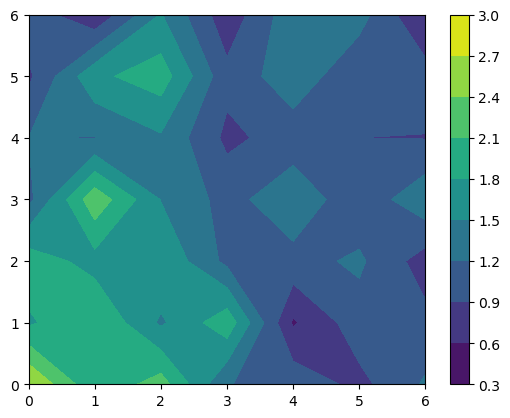

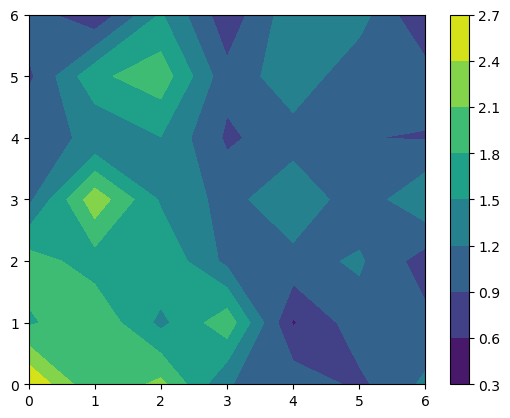

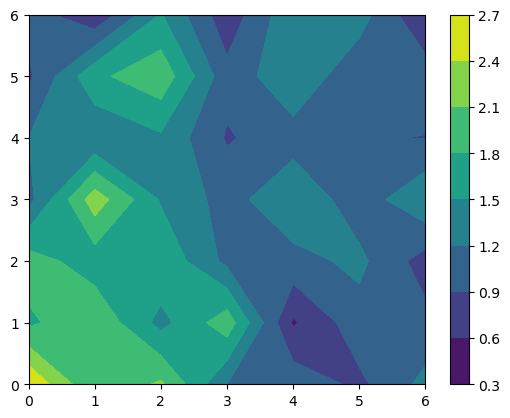

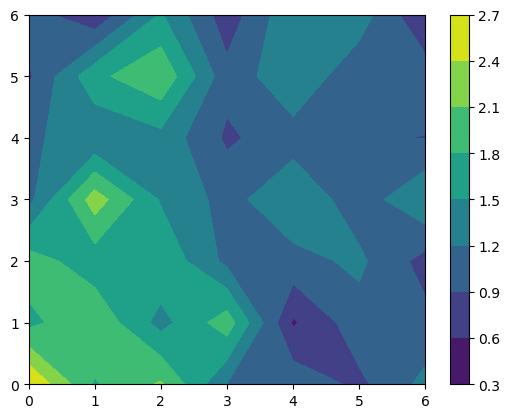

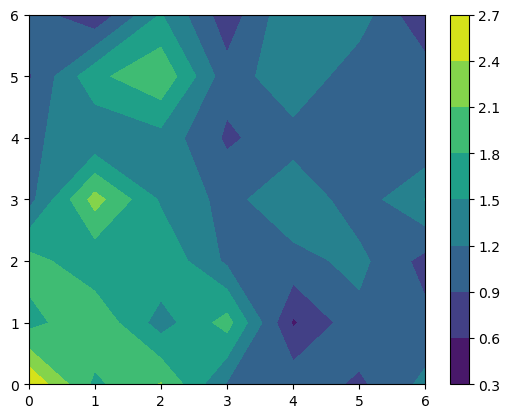

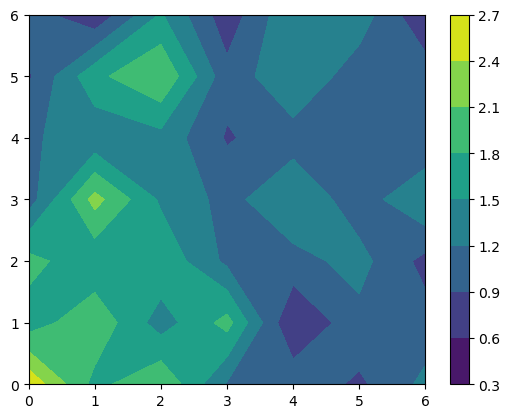

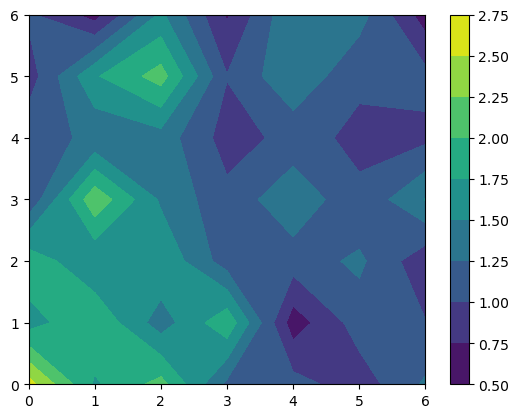

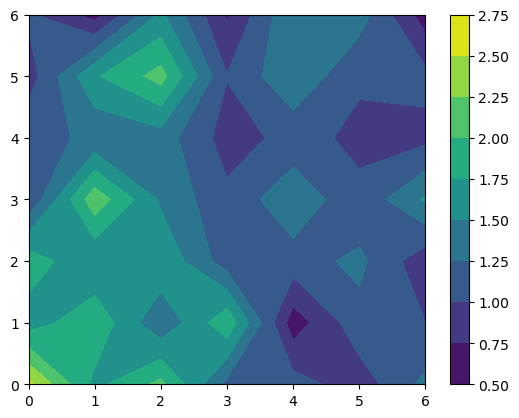

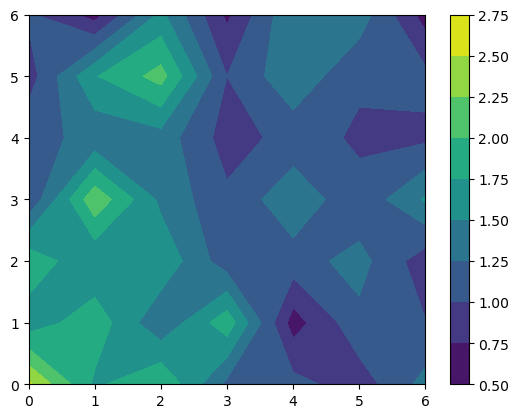

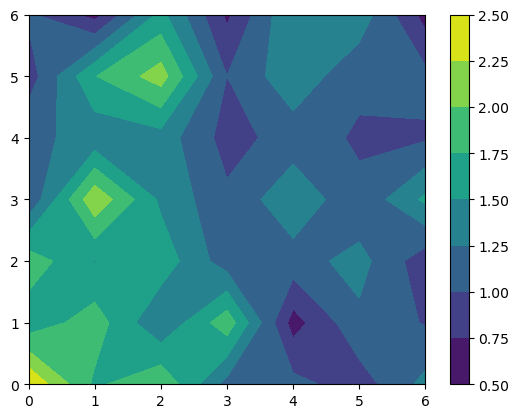

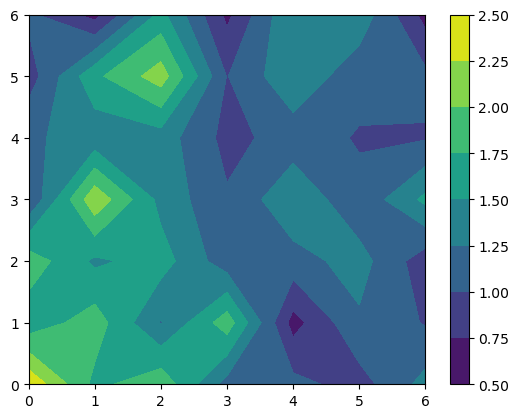

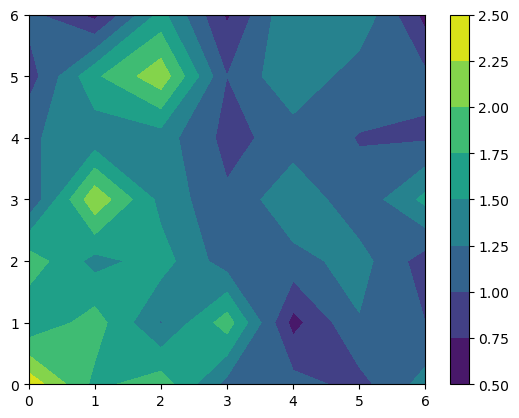

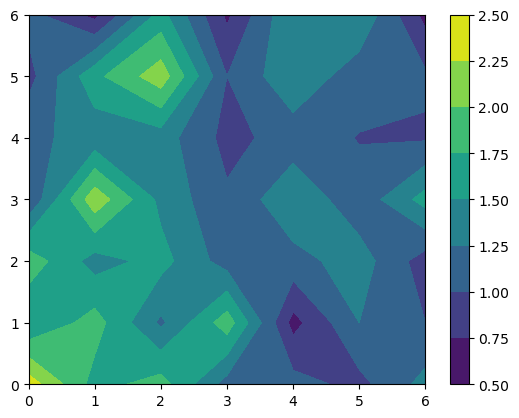

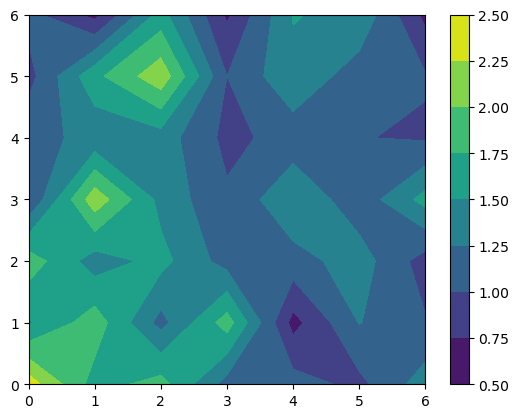

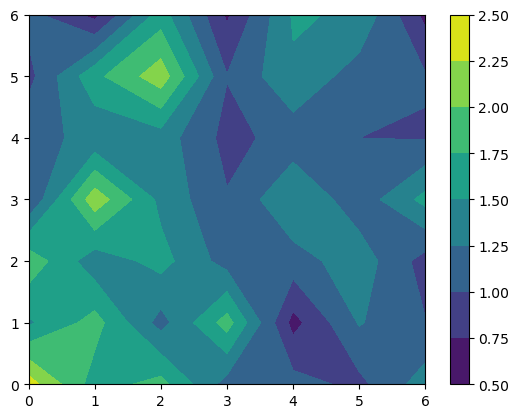

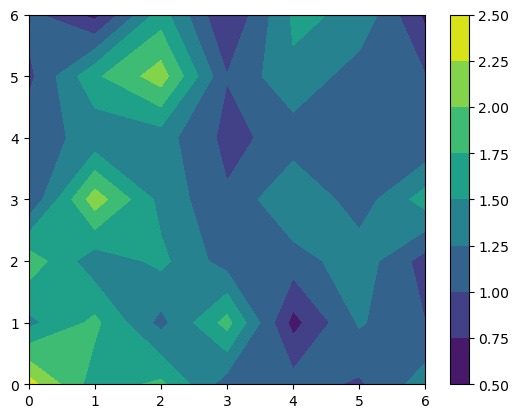

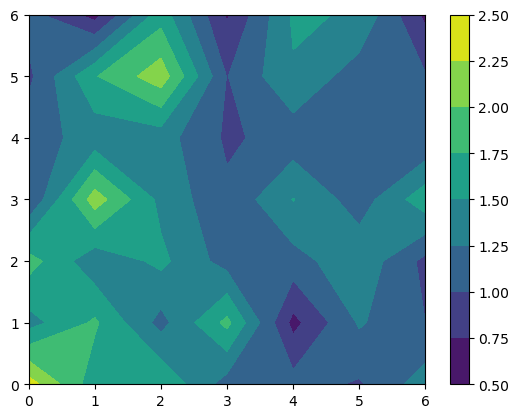

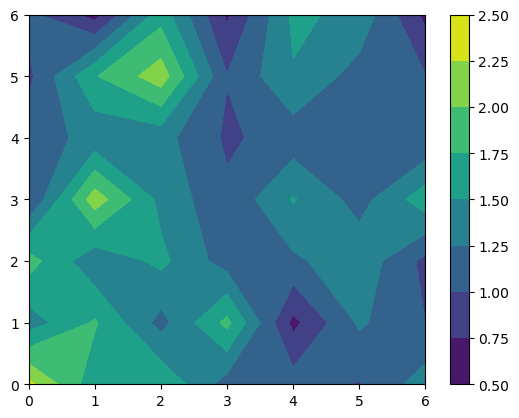

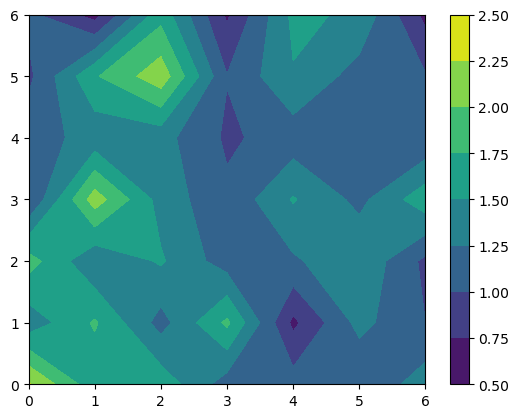

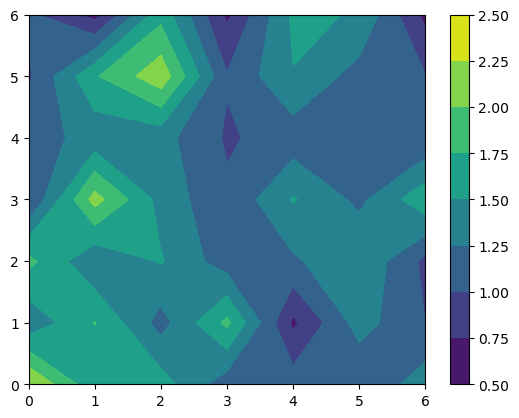

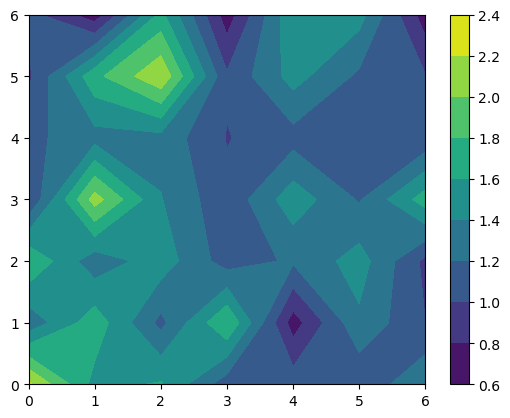

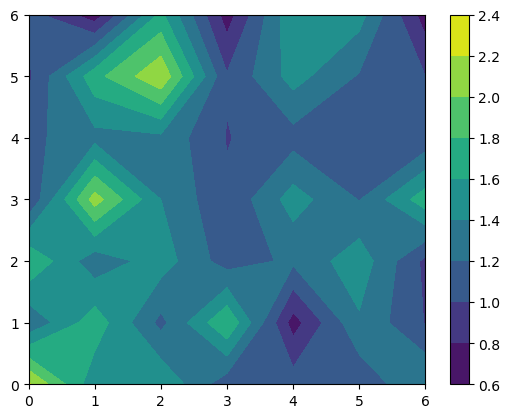

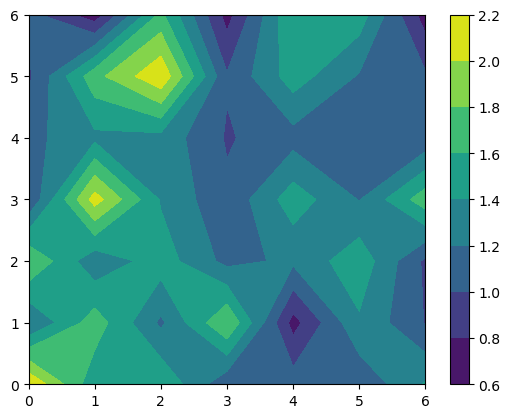

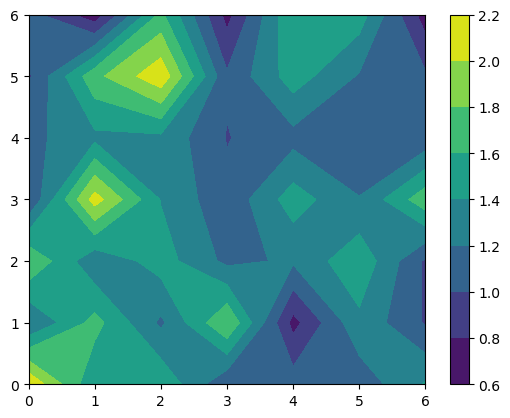

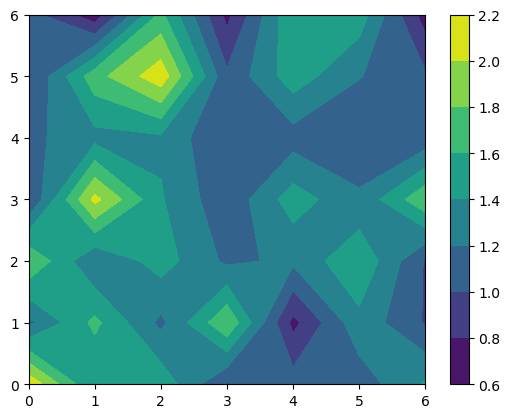

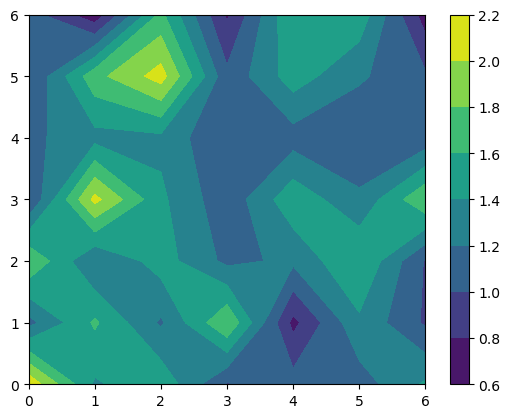

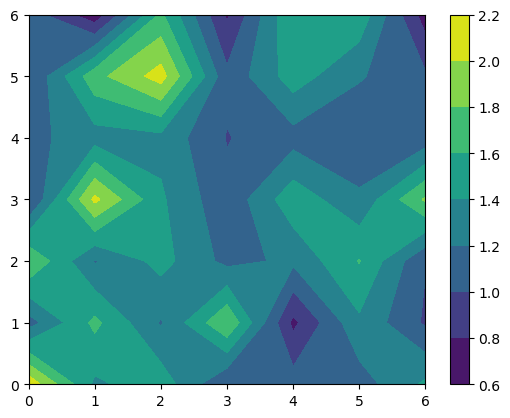

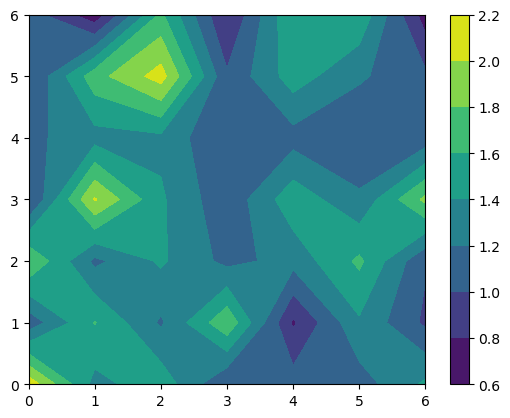

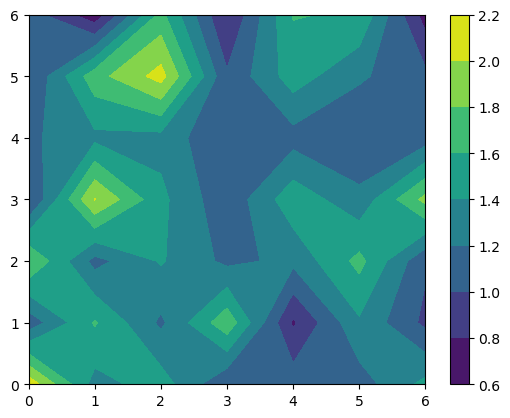

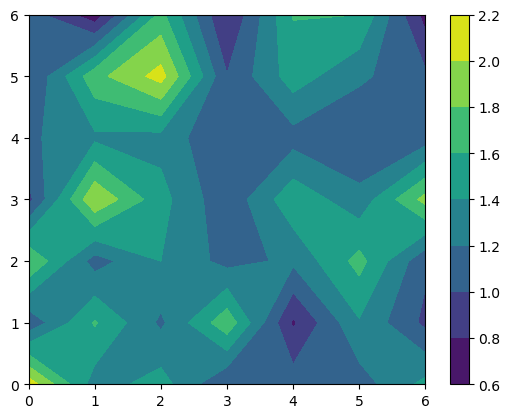

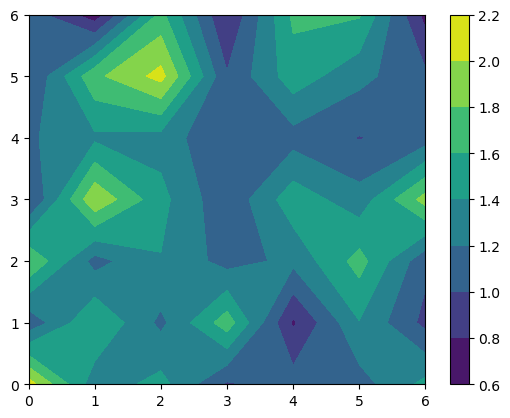

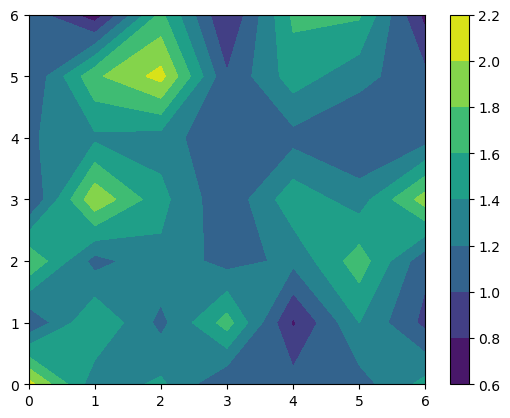

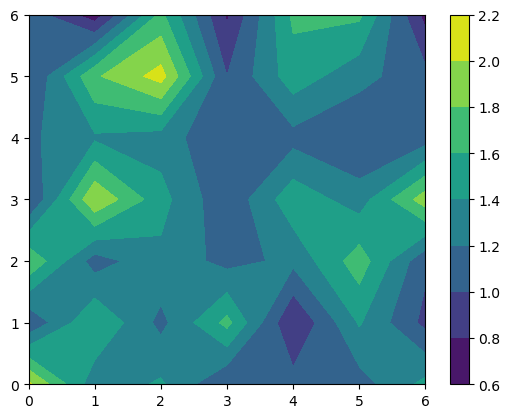

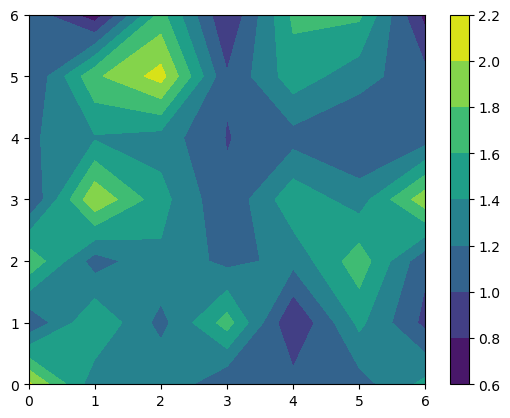

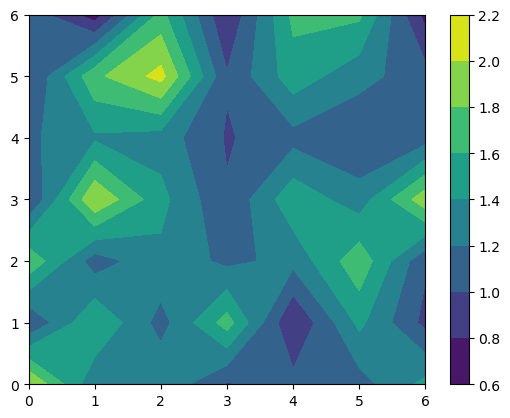

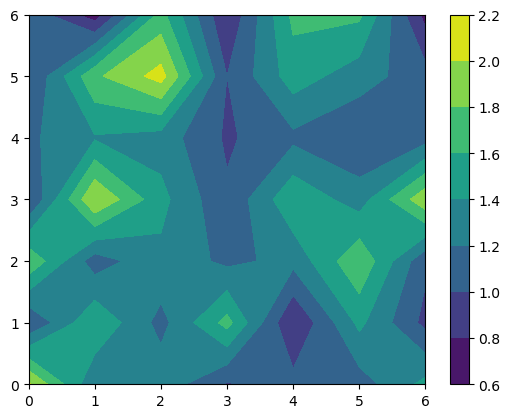

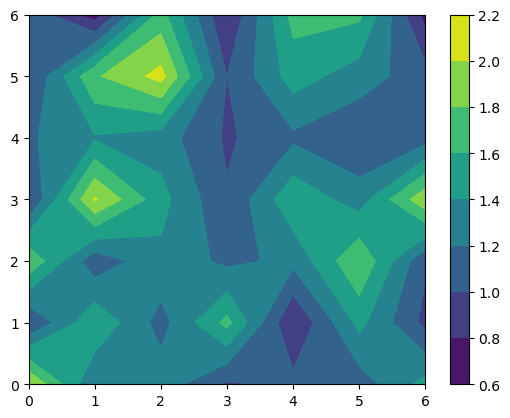

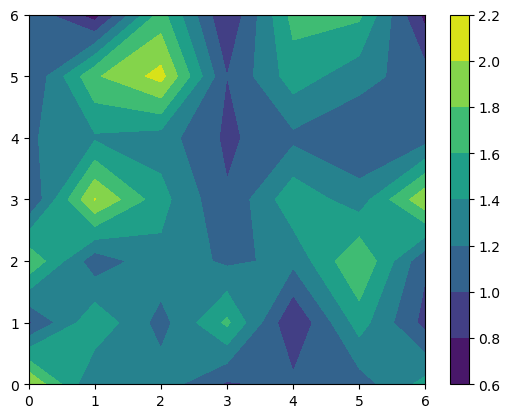

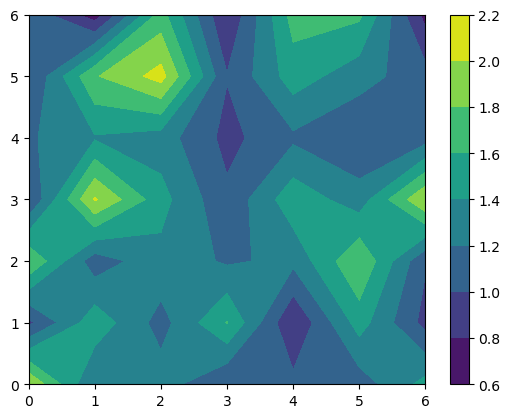

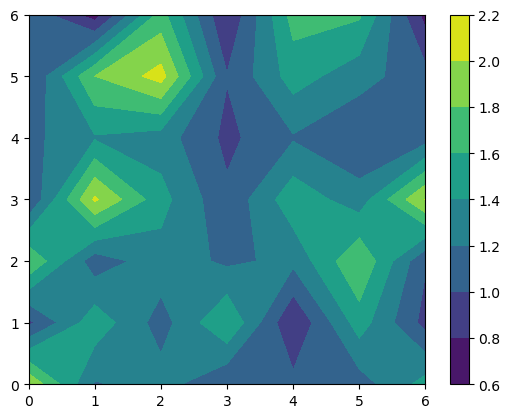

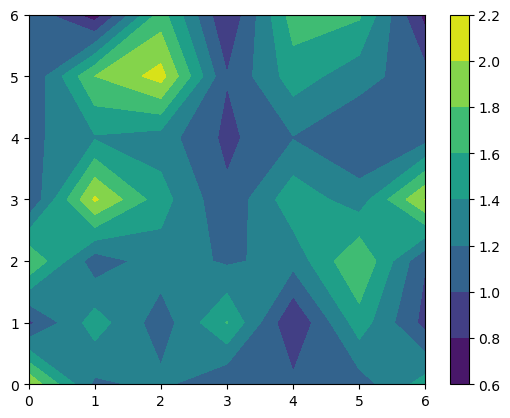

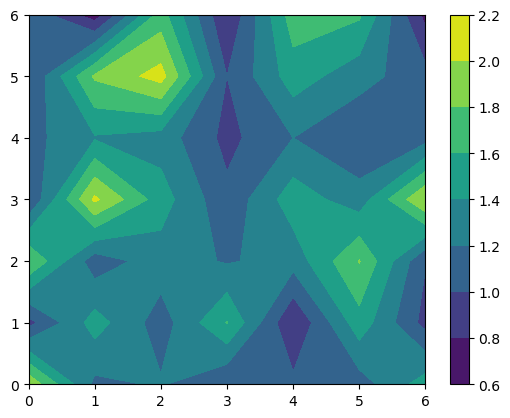

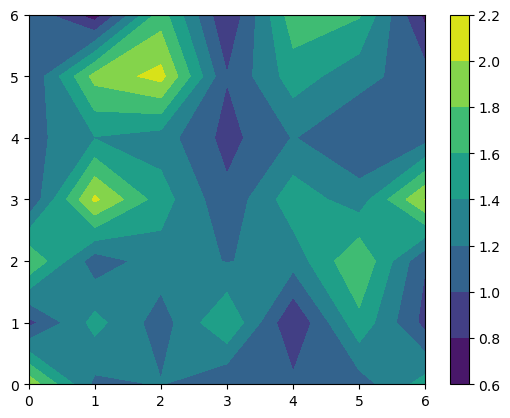

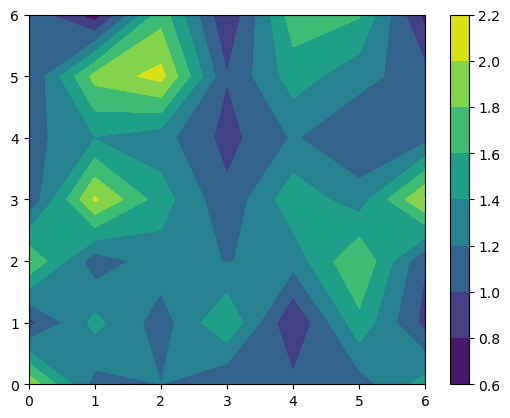

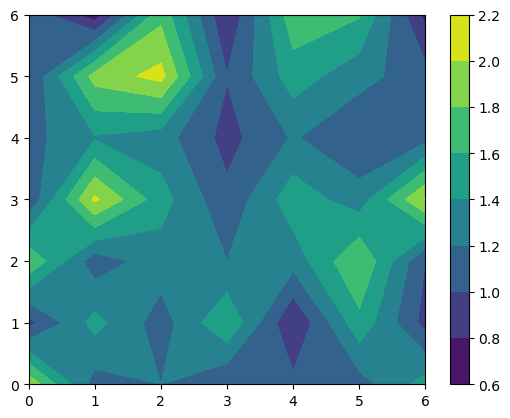

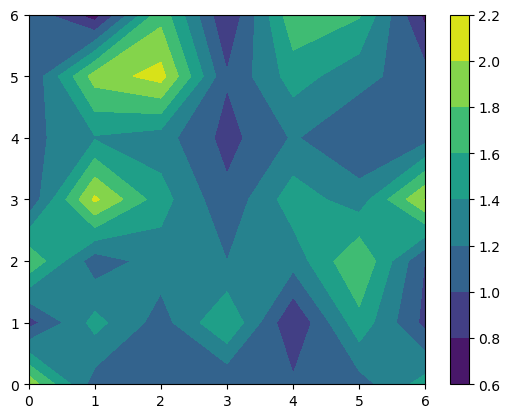

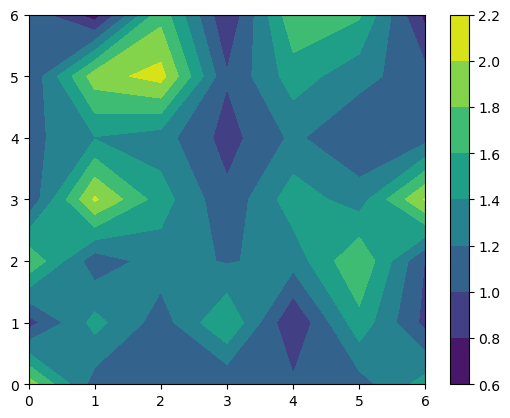

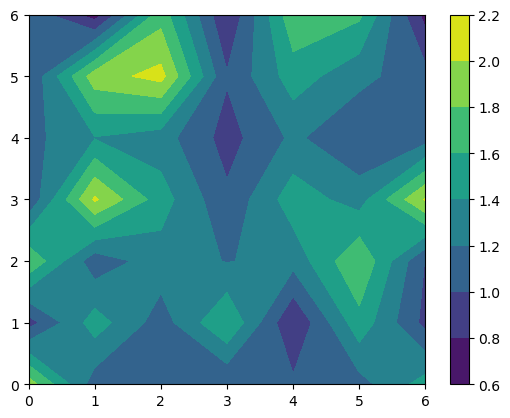

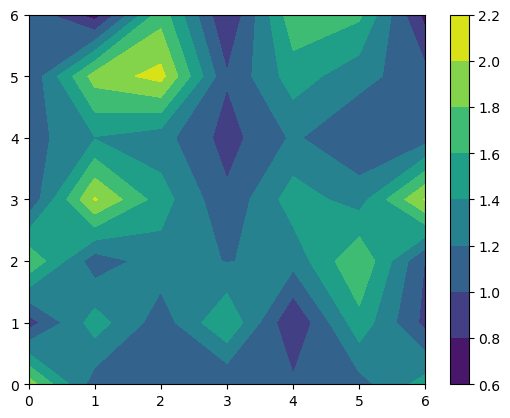

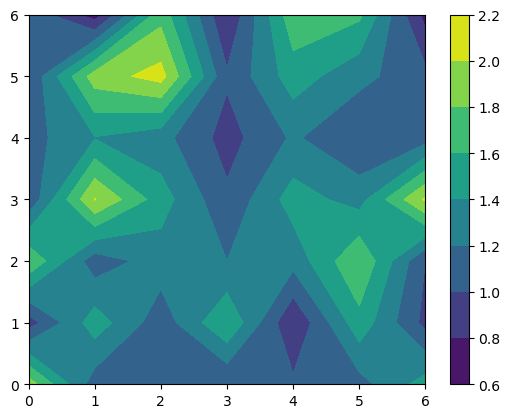

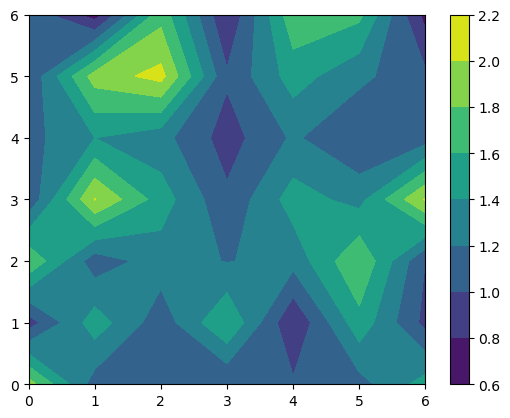

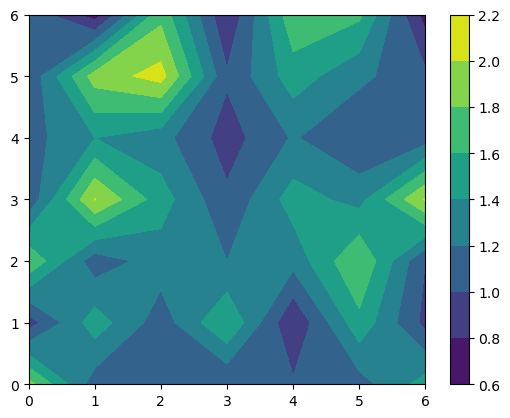

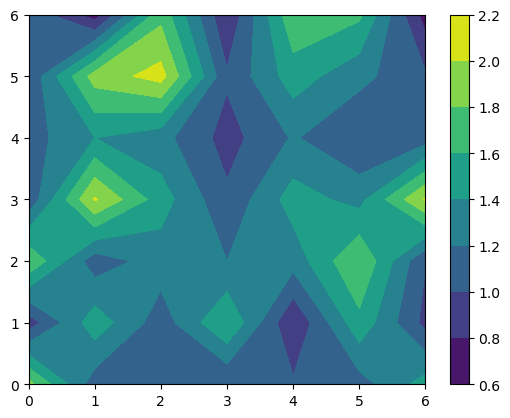

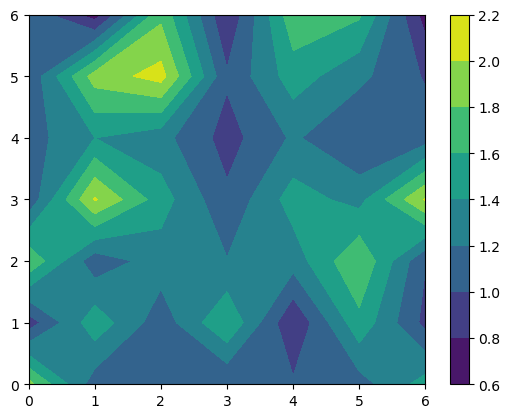

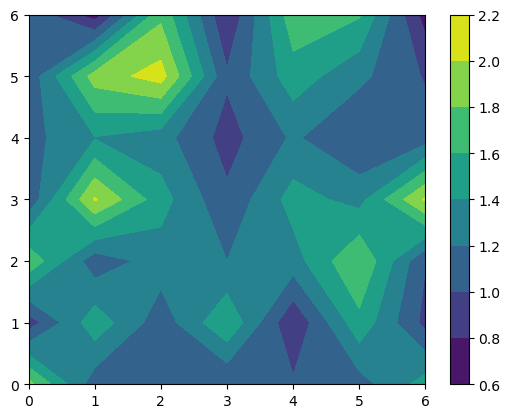

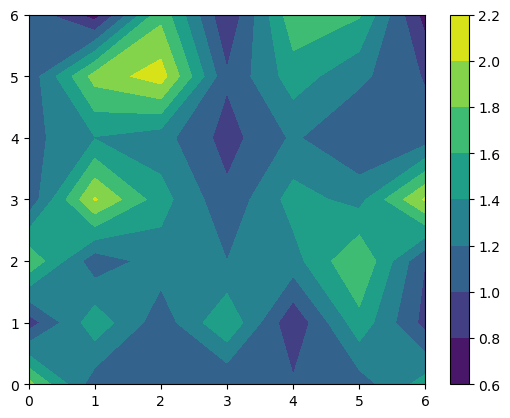

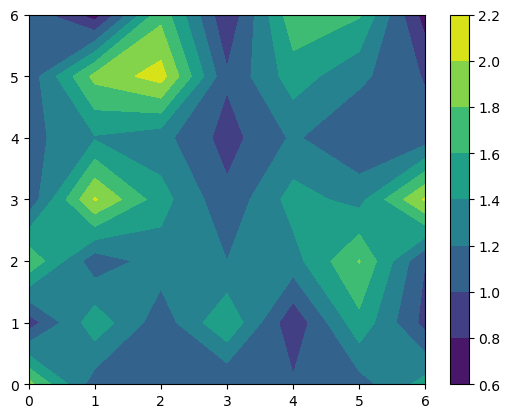

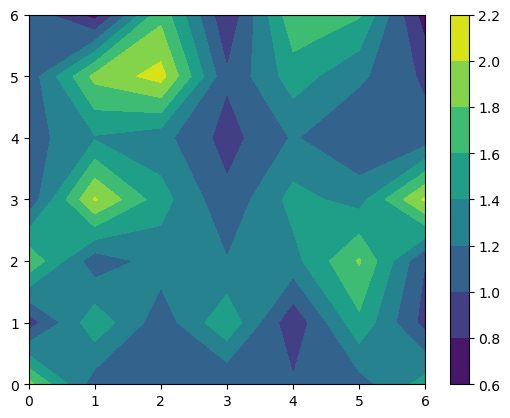

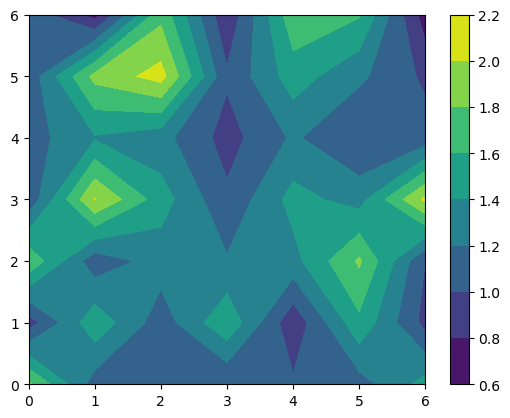

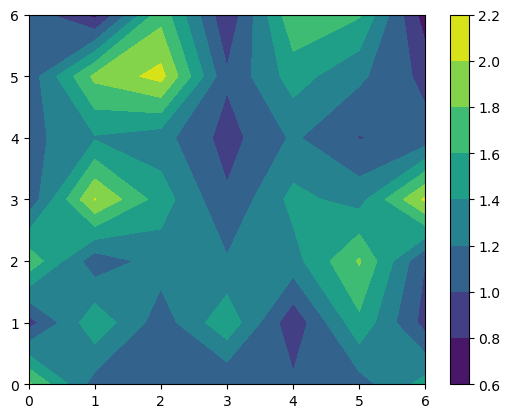

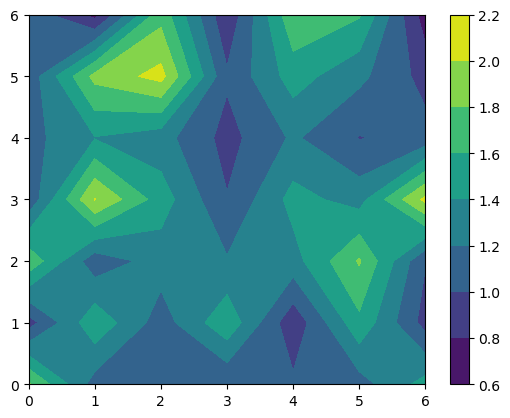

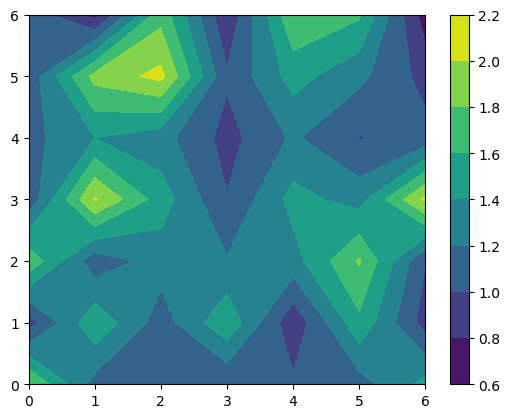

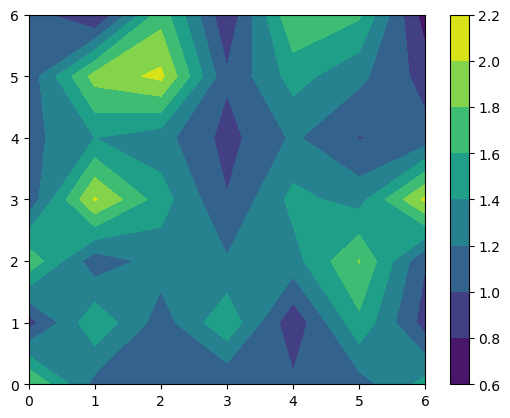

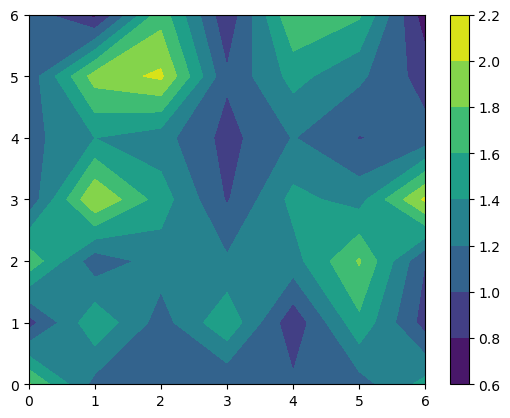

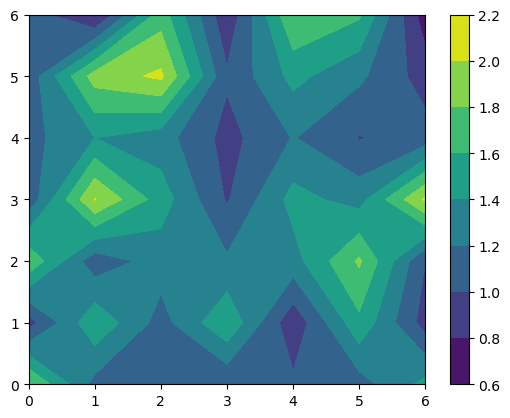

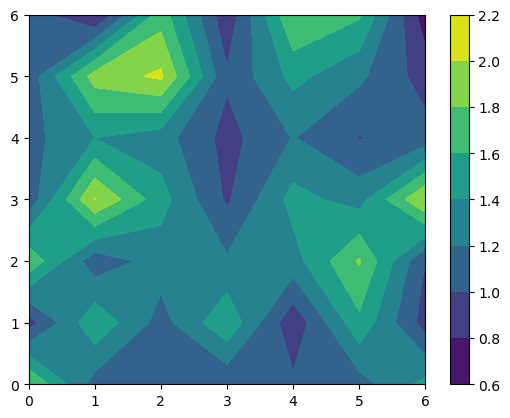

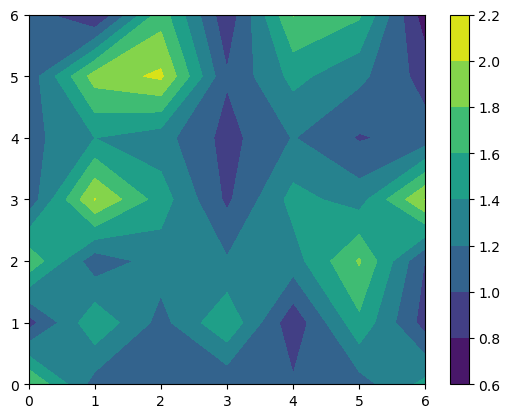

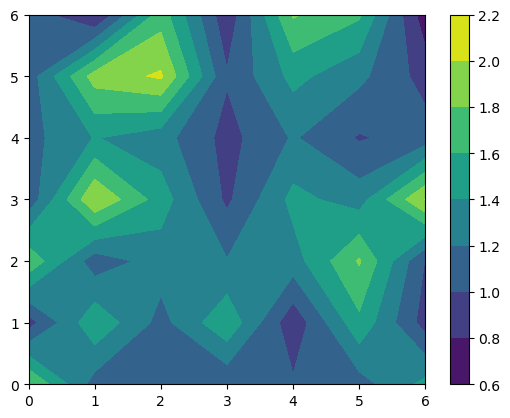

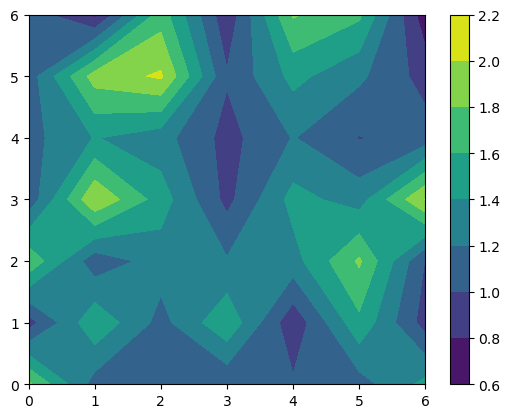

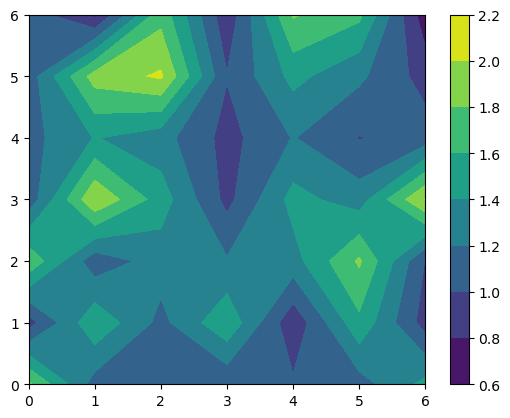

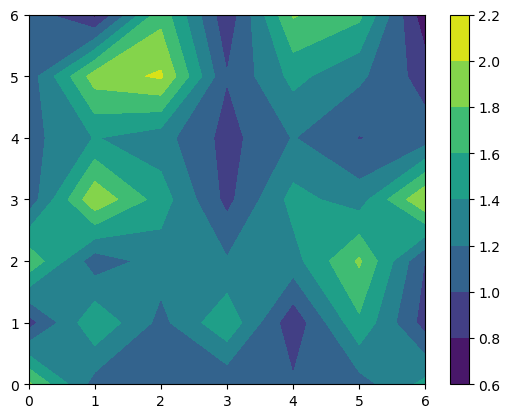

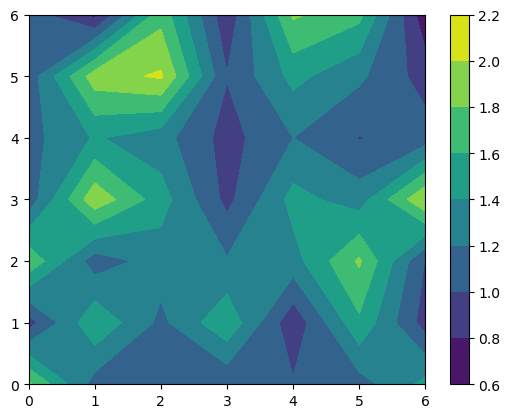

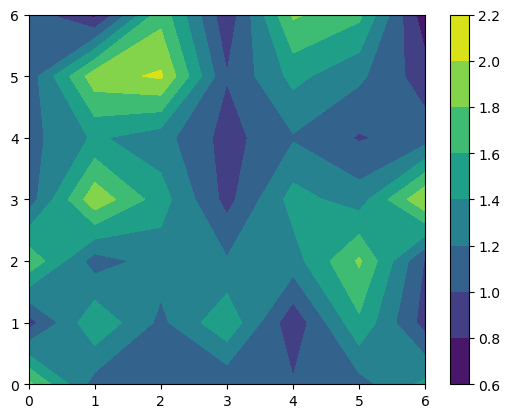

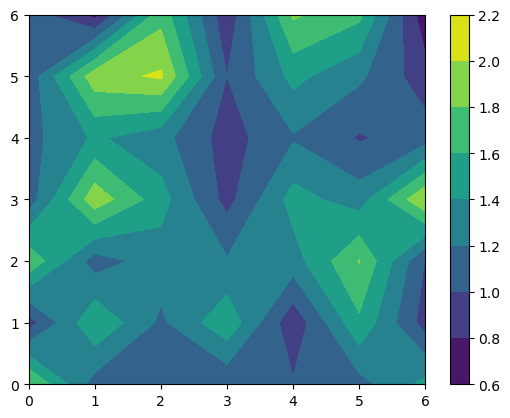

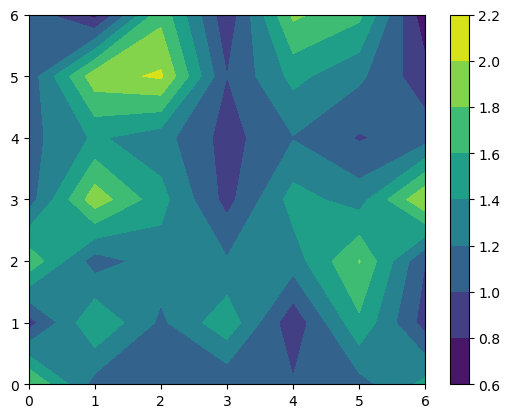

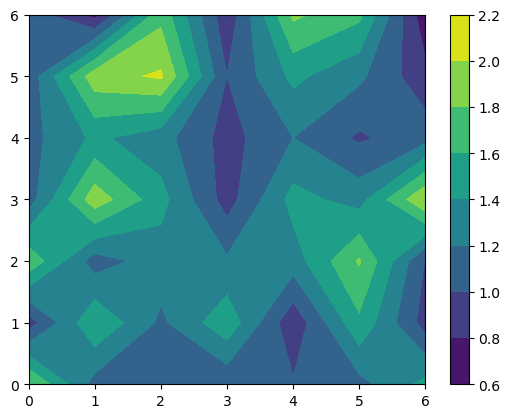

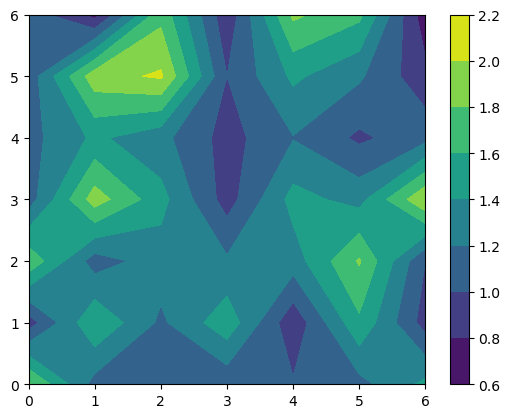

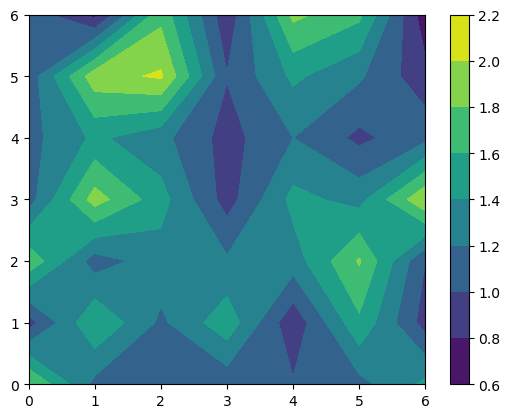

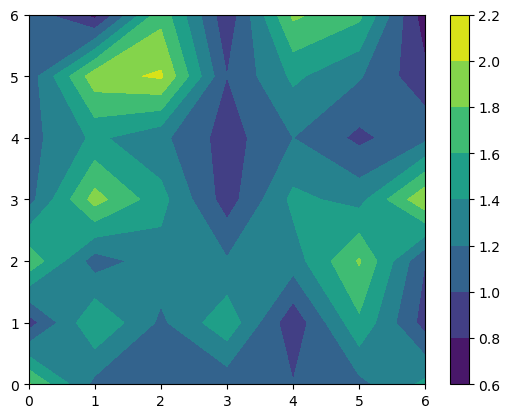

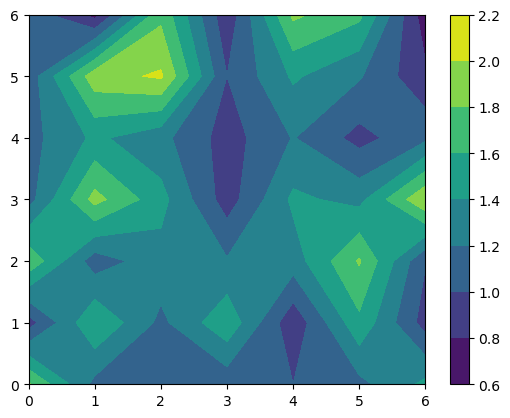

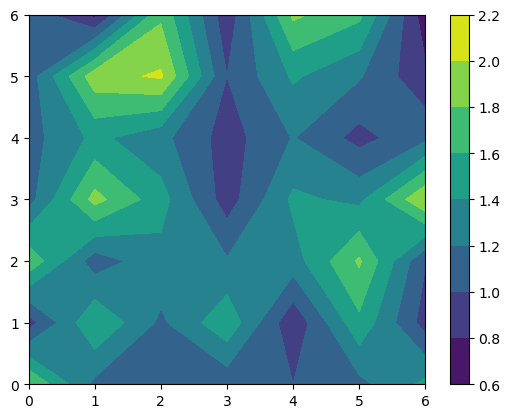

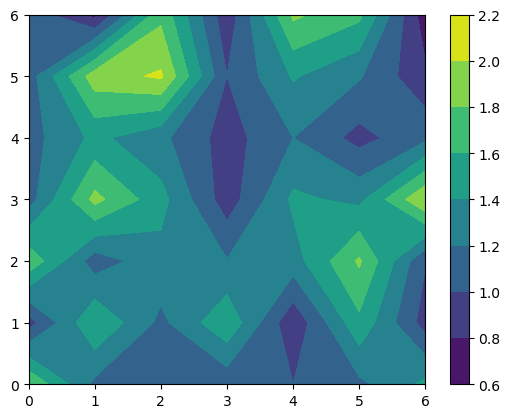

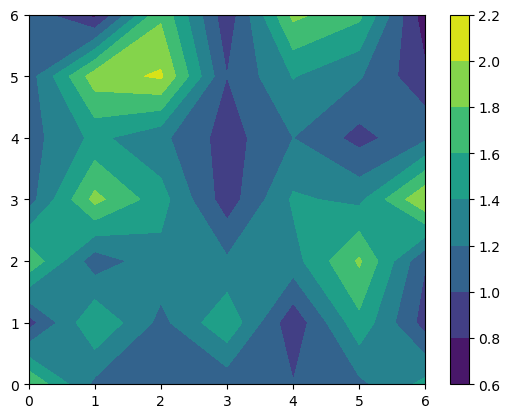

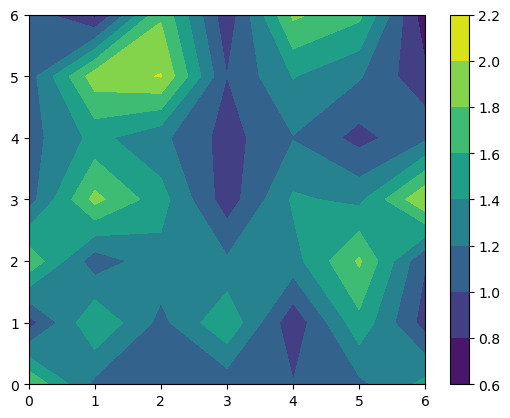

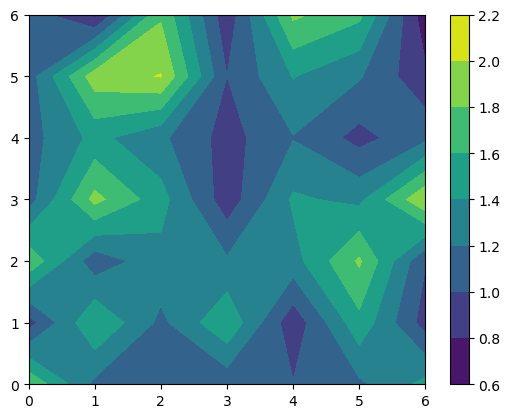

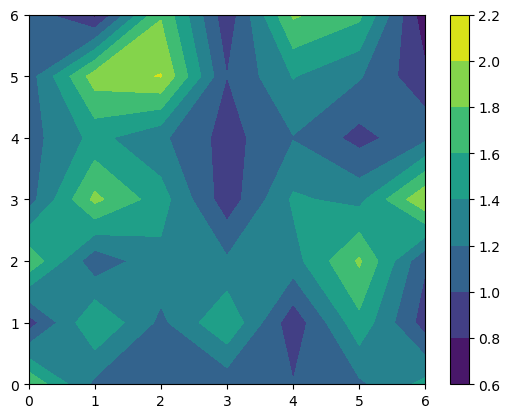

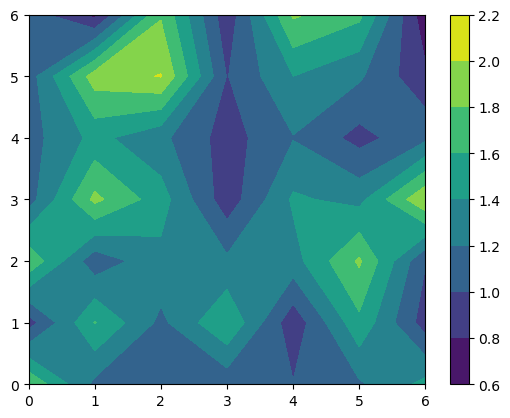

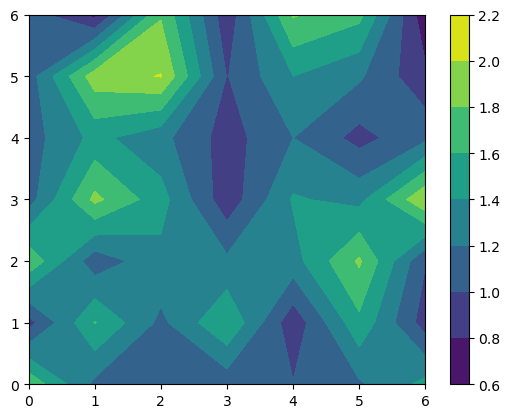

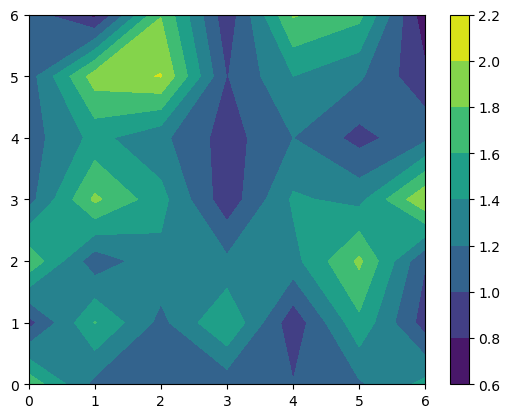

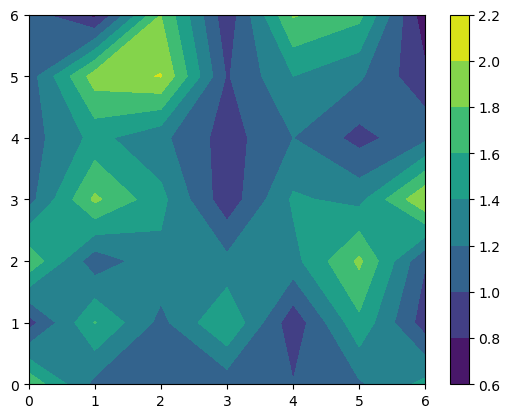

In [56]:
import scipy
import numpy as np 
import matplotlib.pyplot as plt
from scipy.io import loadmat

data = loadmat("150805.mat")
codes_5=data['Event'][0]['vodr'][0]['codes'][0][0][:,9:16]
s_mgs_13=data['spike'][10][0]['vodr'][0][0] 
Map = np.zeros((7,7,1902)) 
Map_2 = np.zeros((7,7,100)) 

for k in range(146):
    for l in range(7):
        j = (codes_5[k,l]%10)-1
        i = (np.int32(codes_5[k,l])//np.int32(10)) - 3
        Map[i,j,(l*200)+1:((l+1)*200)] = 1
    column = np.where(s_mgs_13[k]==1)[0]
    for z in range(len(column)):
        if(column[z]>100):
            Map_2[:,:,:] = Map_2[:,:,:] + Map[:,:,(column[z]-101):column[z]-1]/100
    Map = np.zeros((7,7,1902))
for t in range(100):
    plt.contourf(Map_2[:,:,t])
    plt.colorbar()
    plt.show()

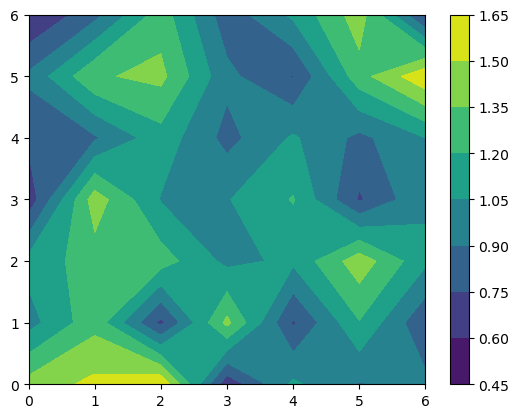

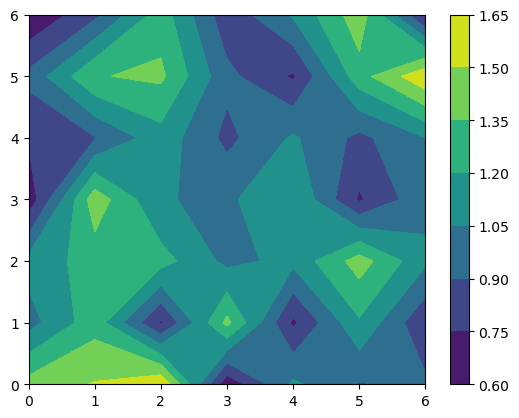

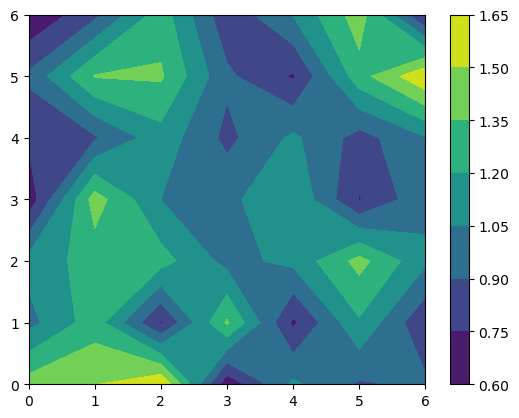

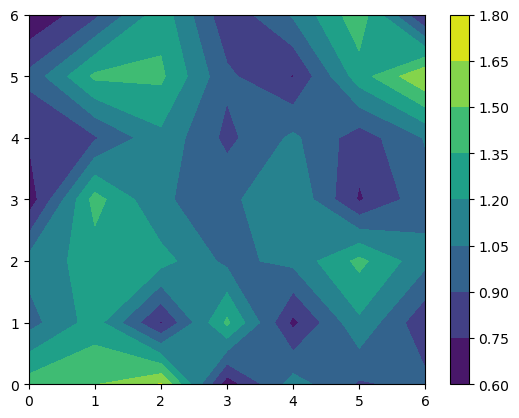

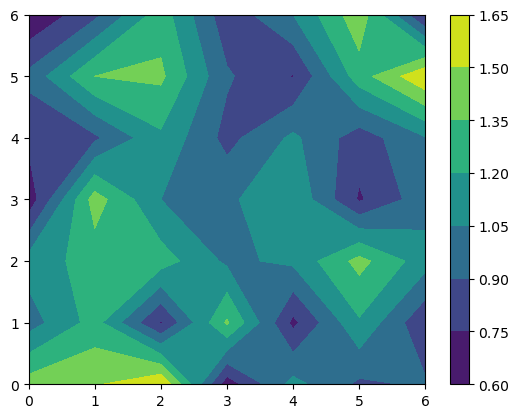

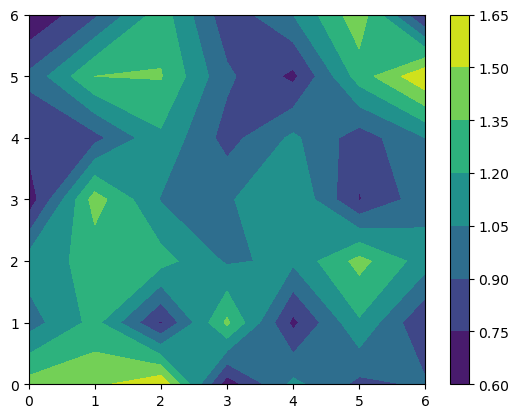

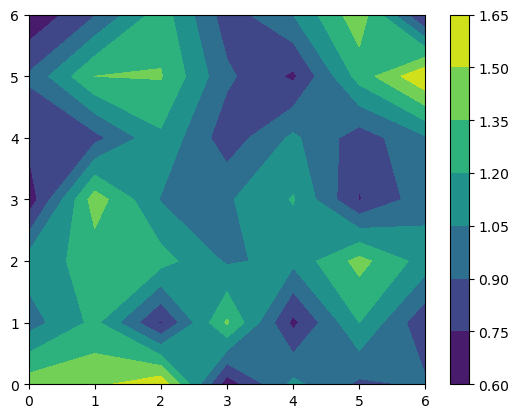

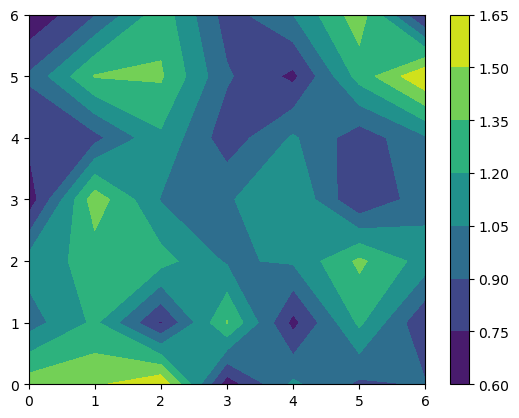

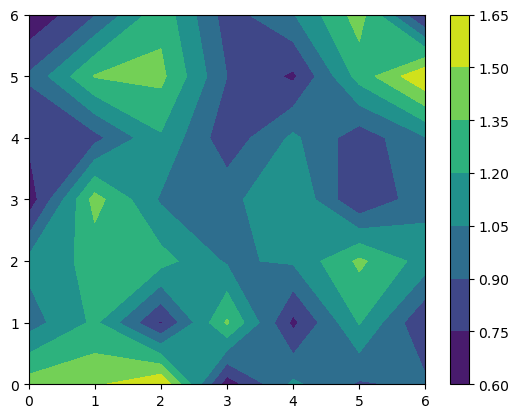

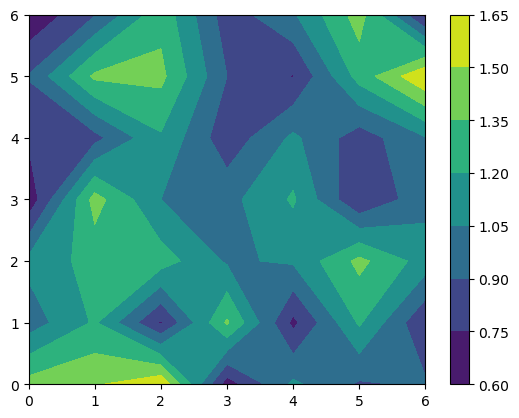

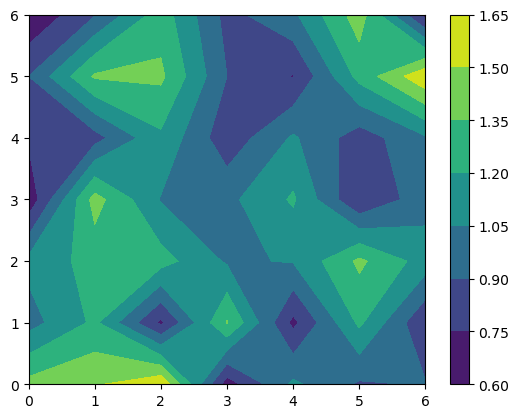

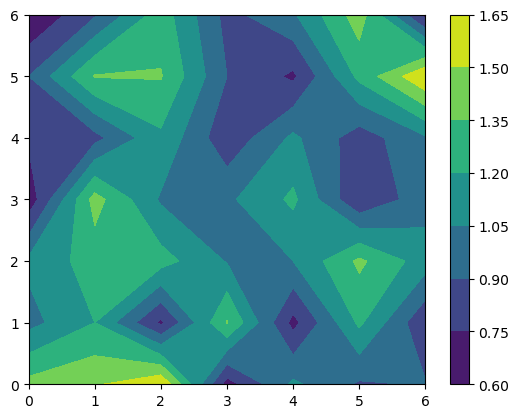

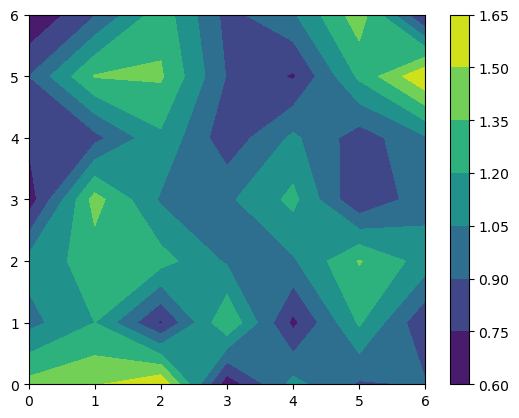

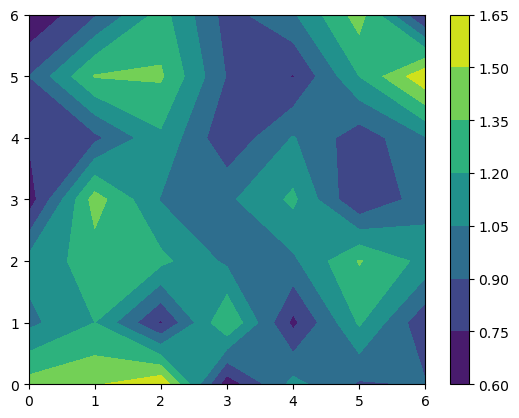

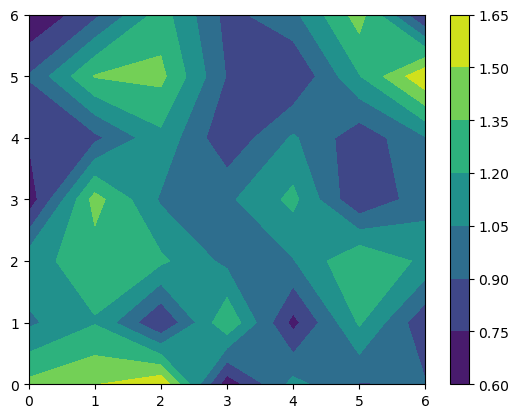

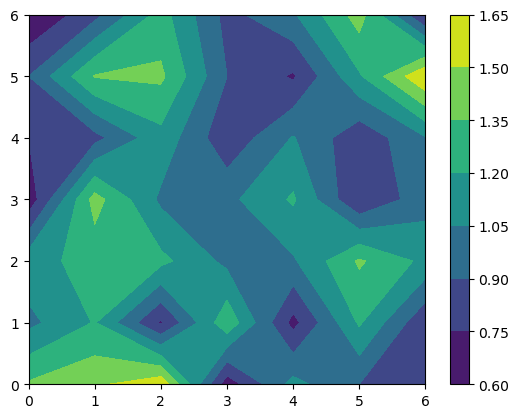

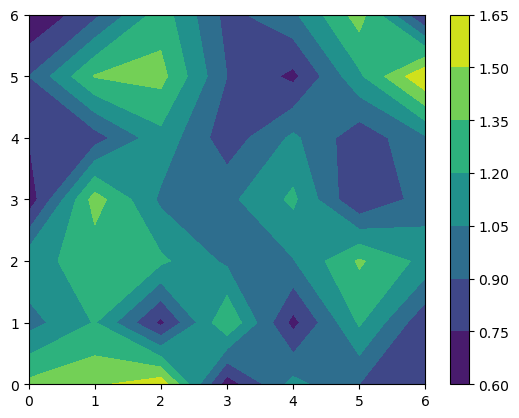

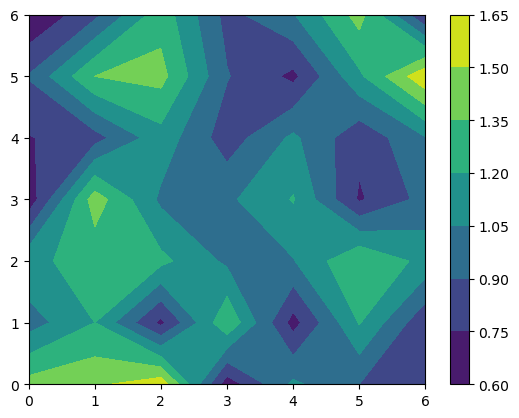

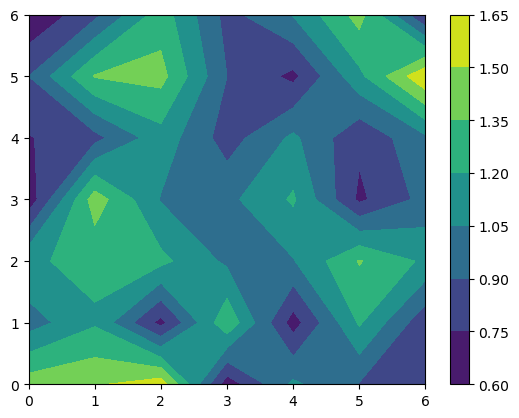

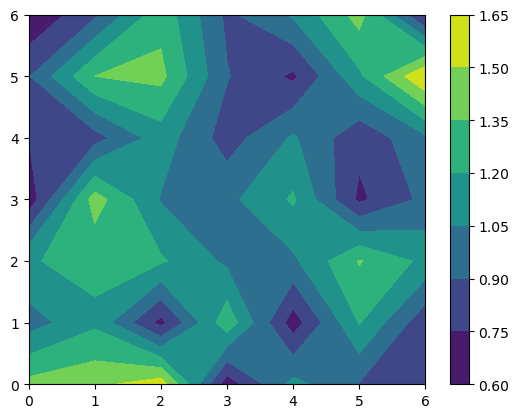

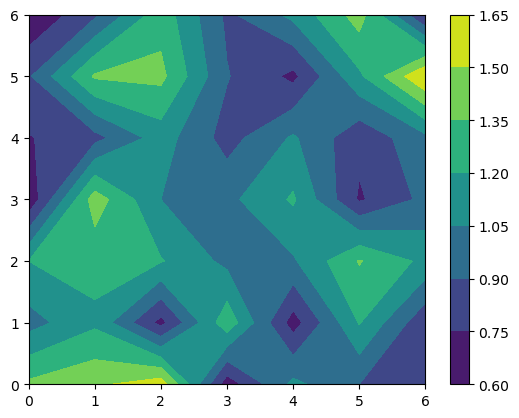

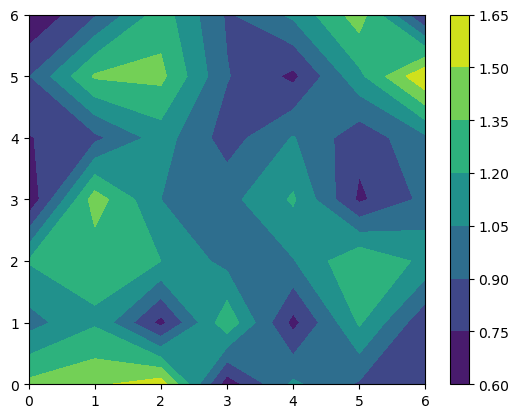

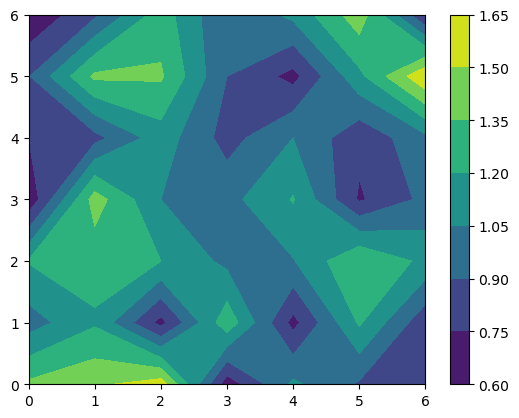

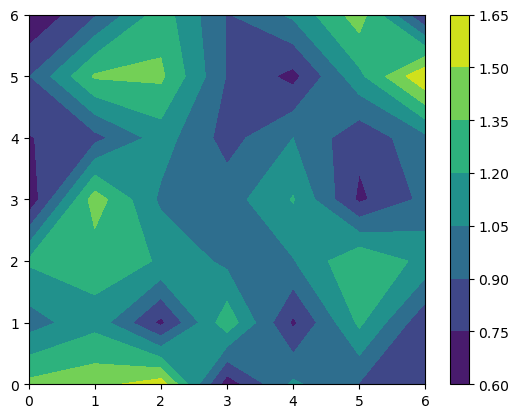

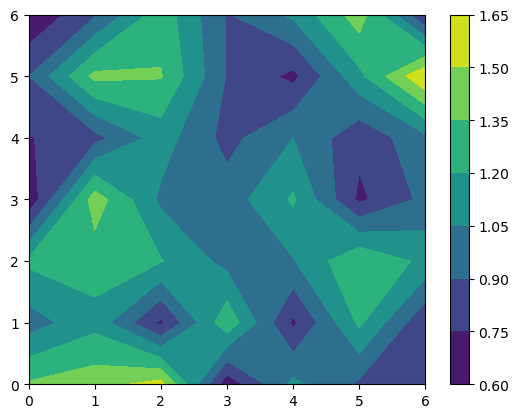

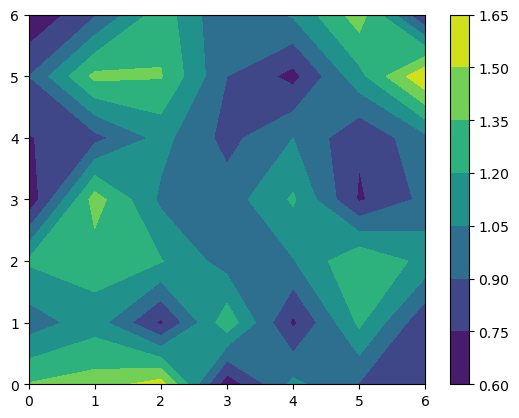

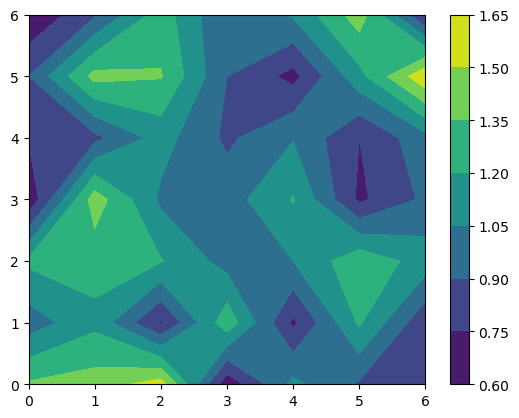

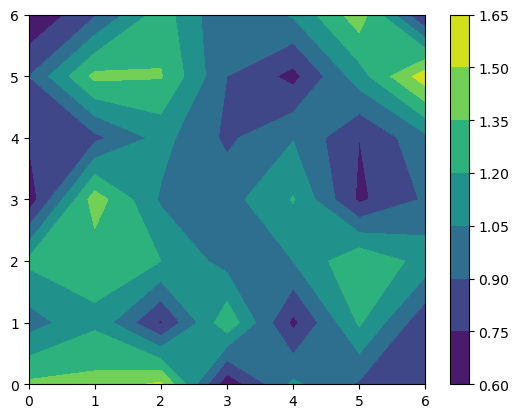

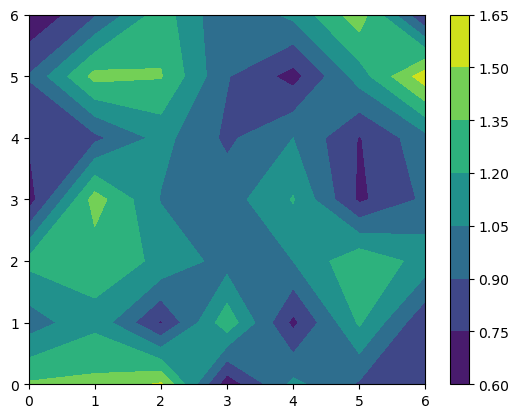

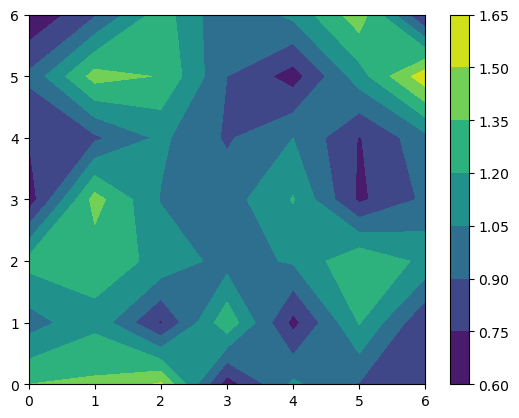

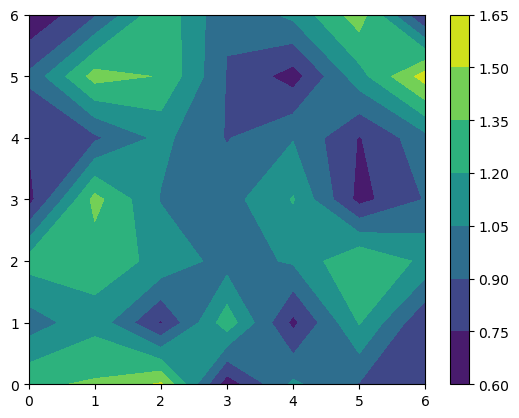

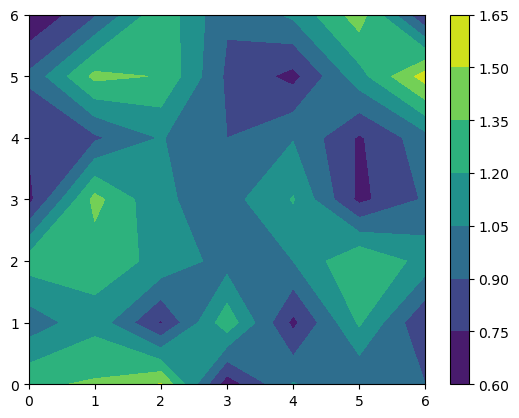

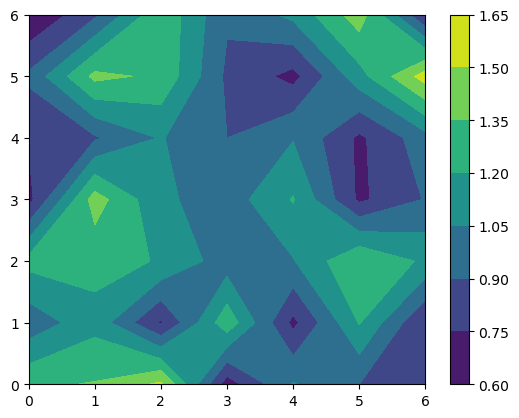

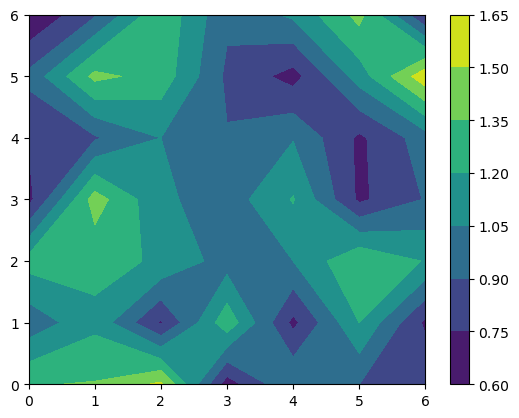

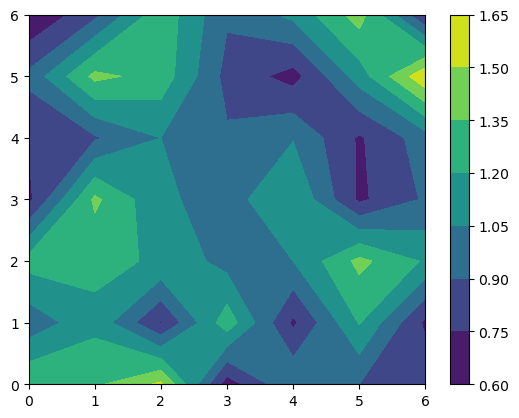

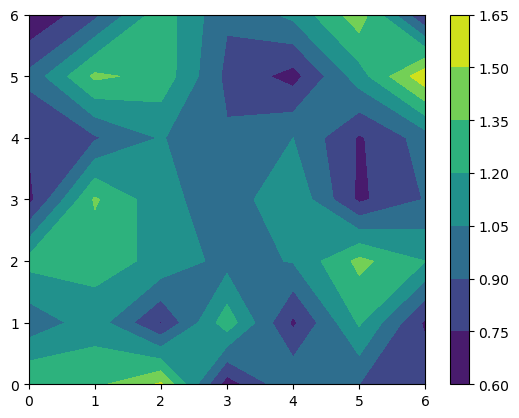

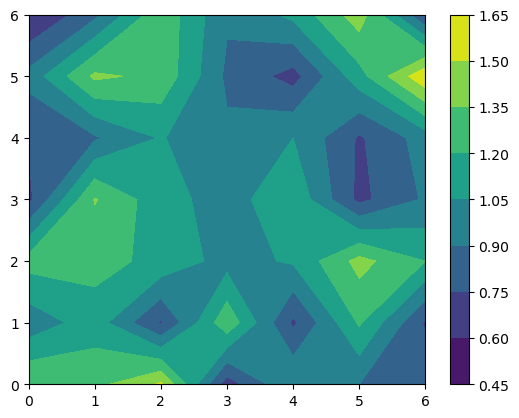

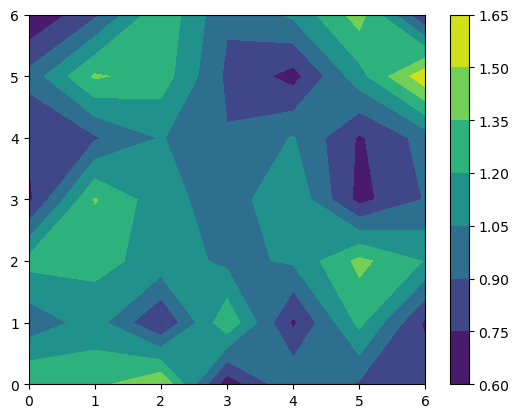

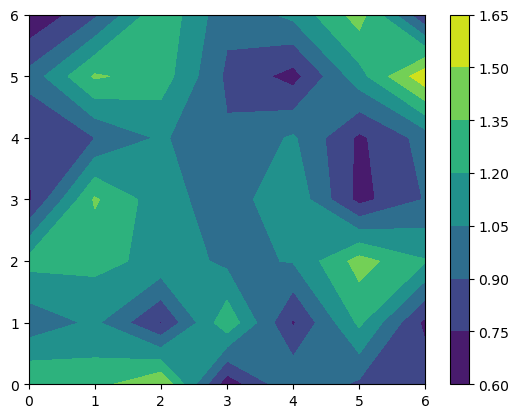

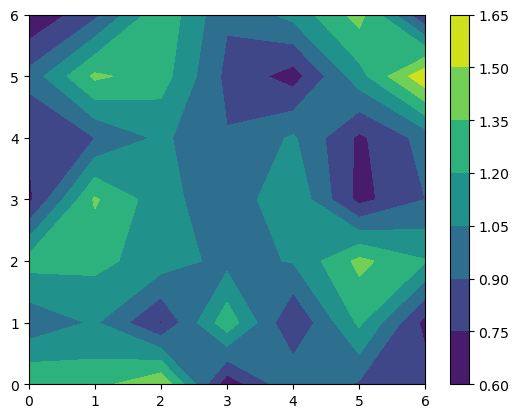

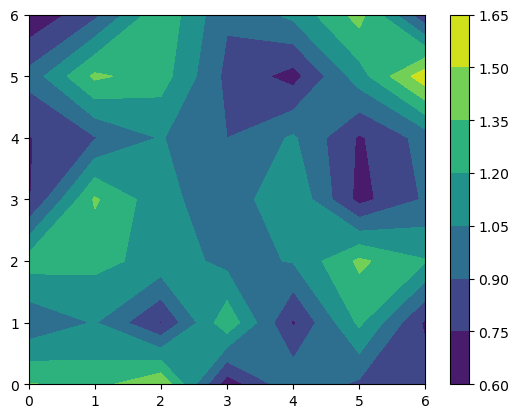

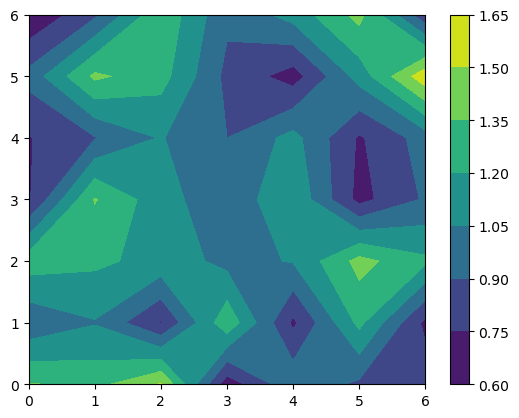

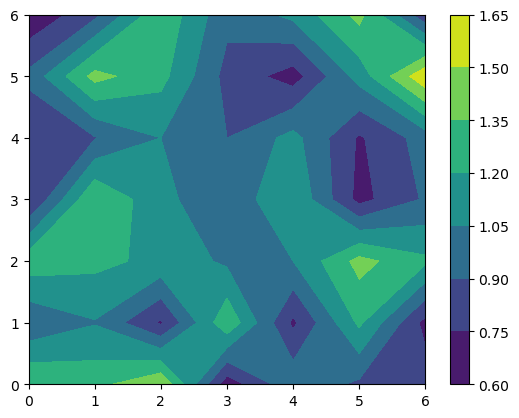

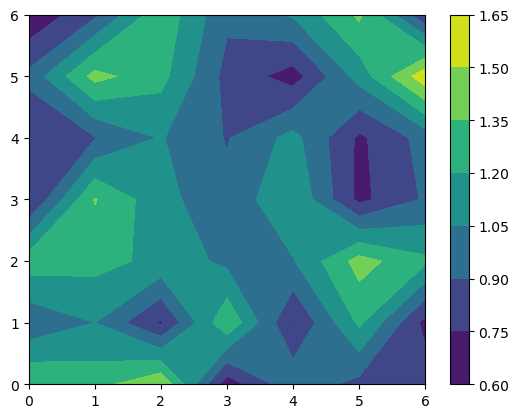

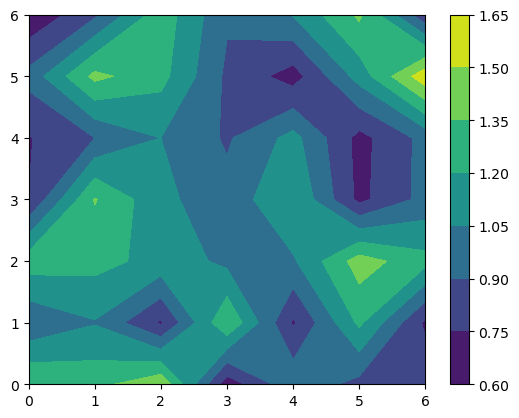

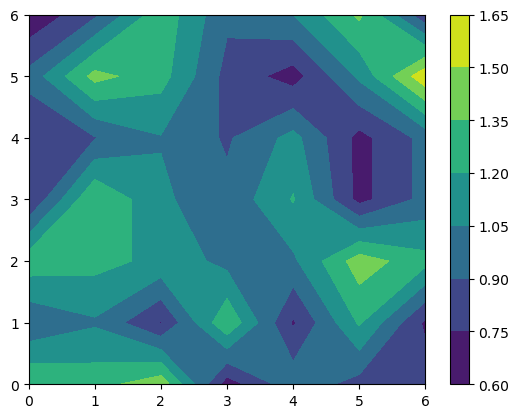

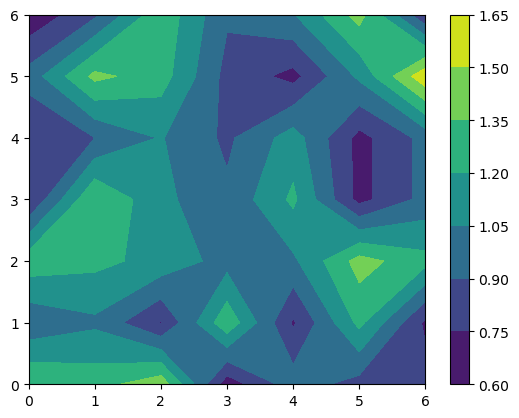

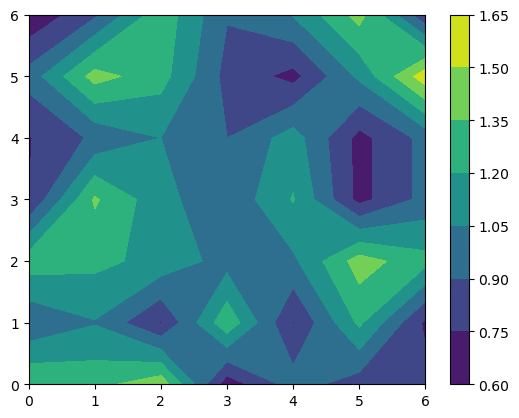

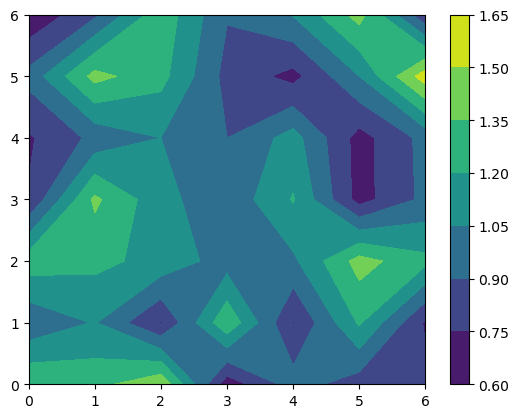

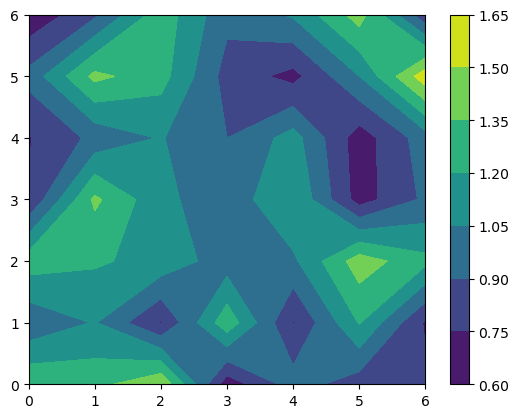

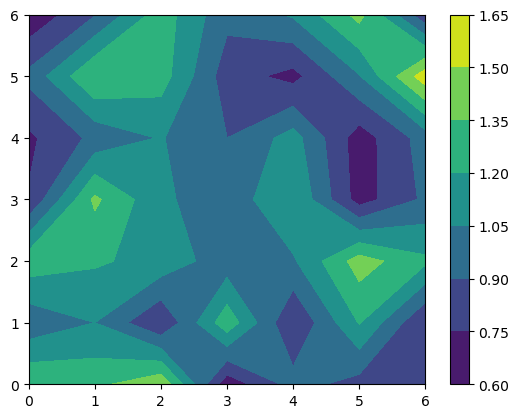

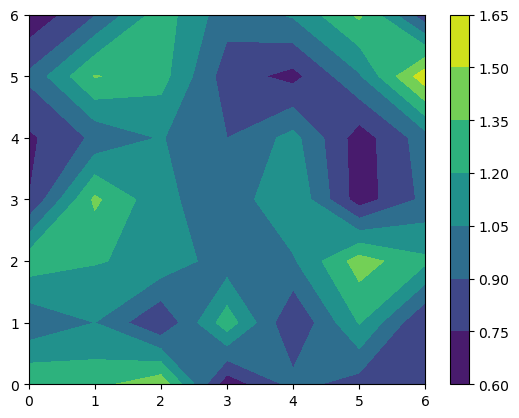

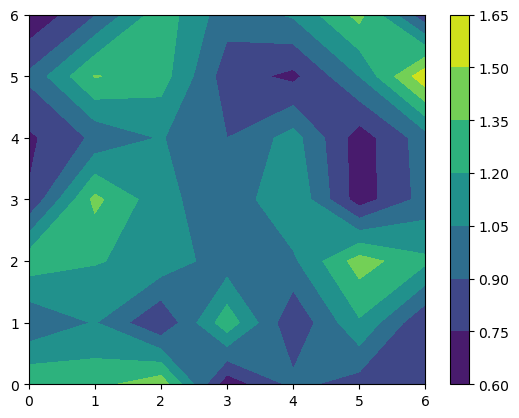

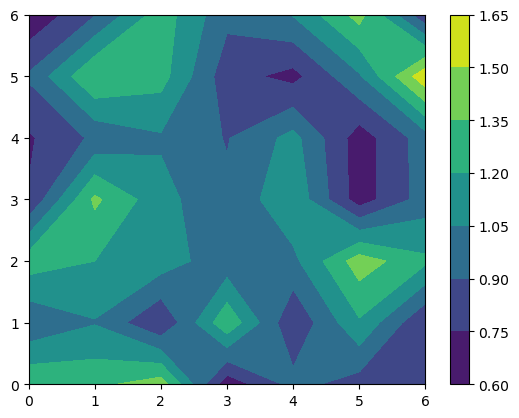

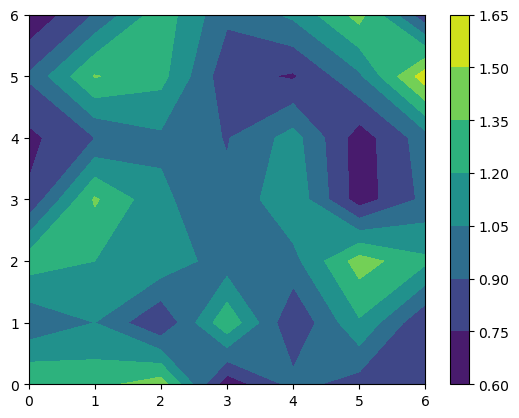

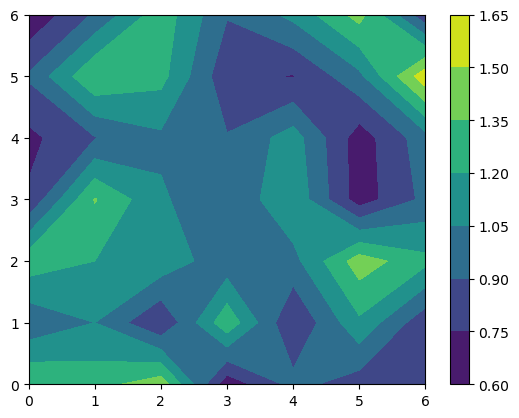

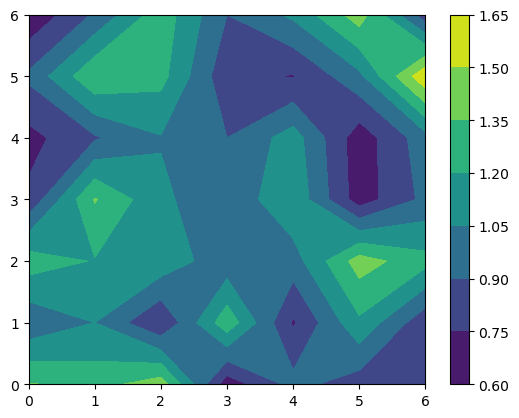

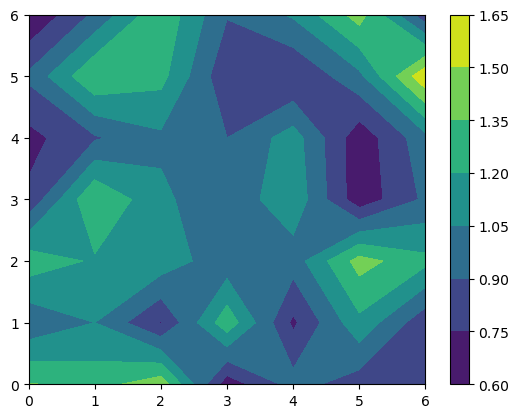

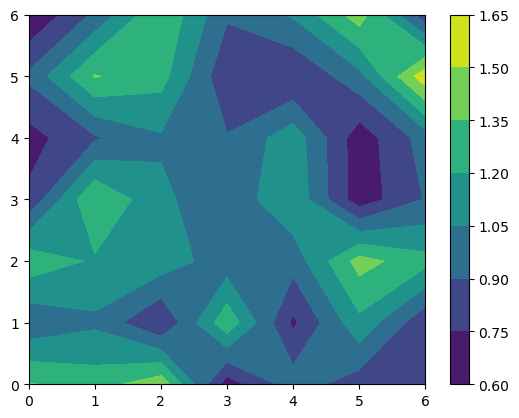

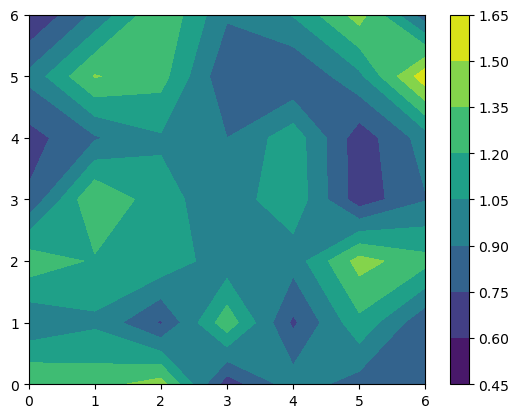

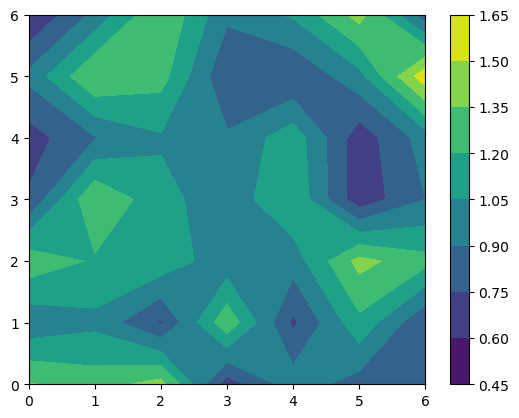

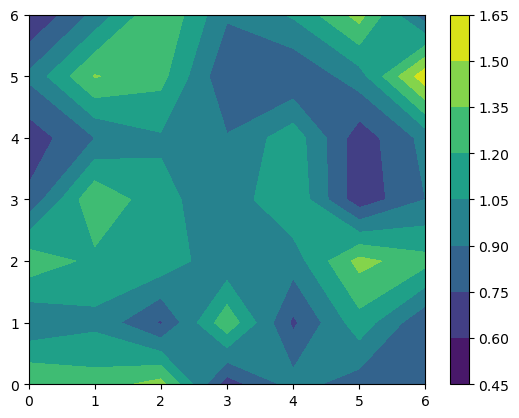

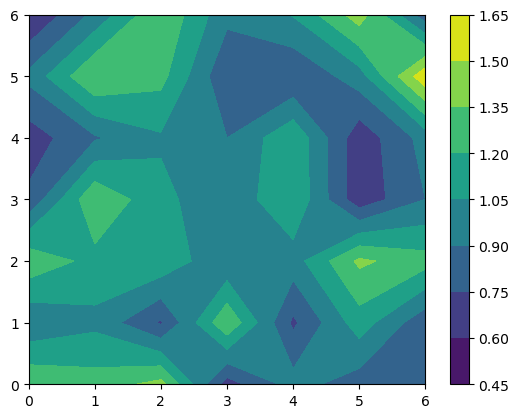

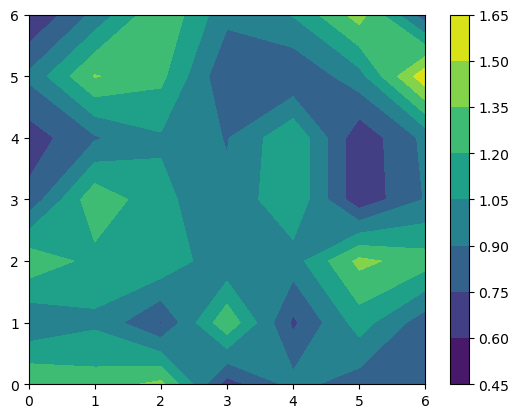

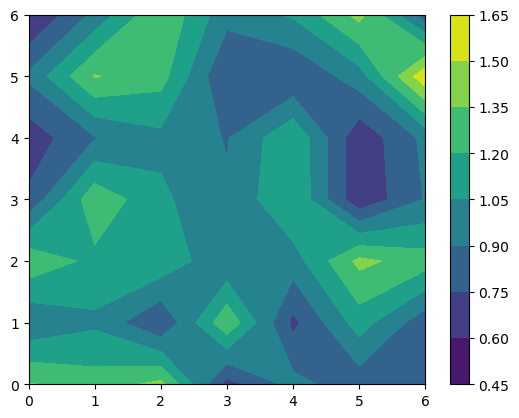

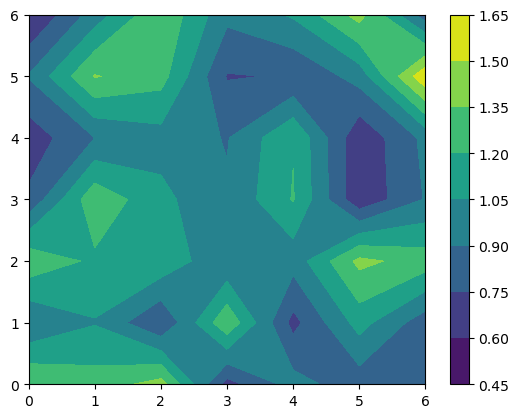

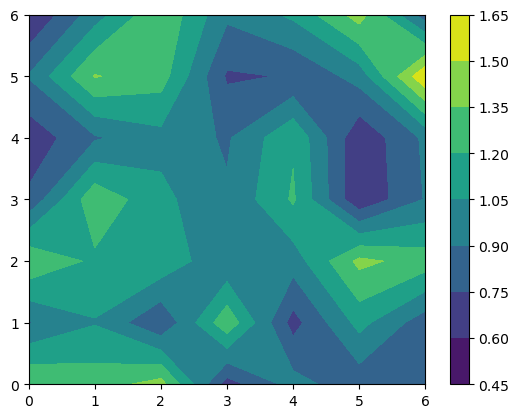

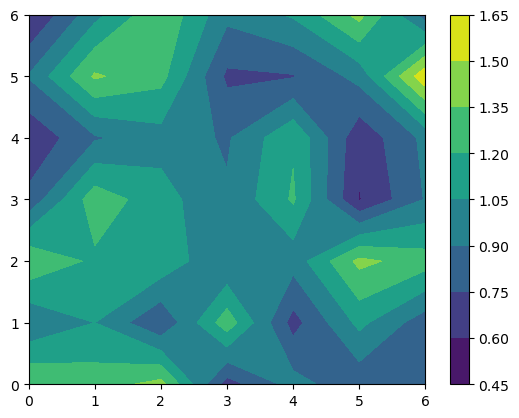

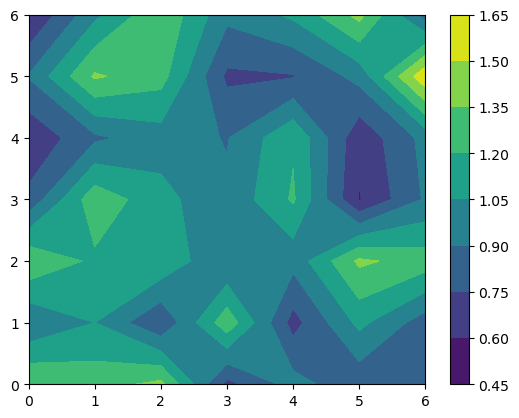

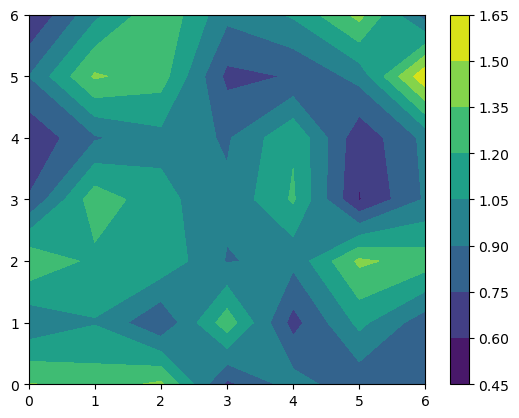

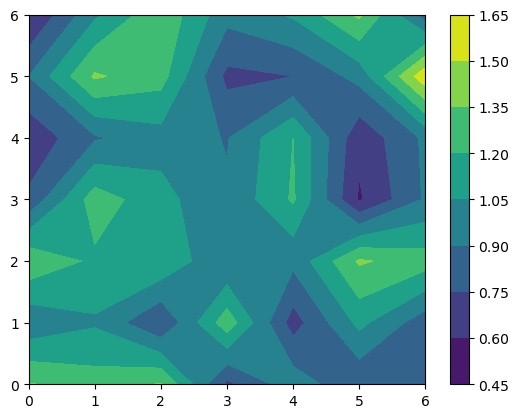

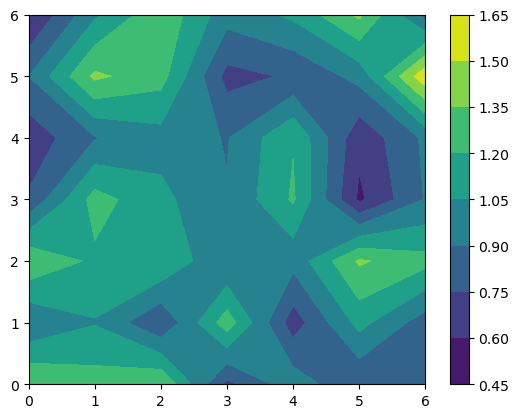

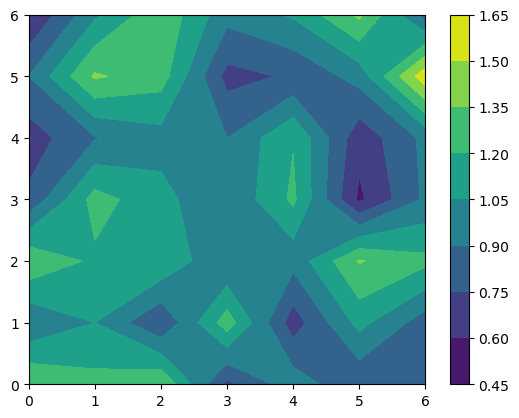

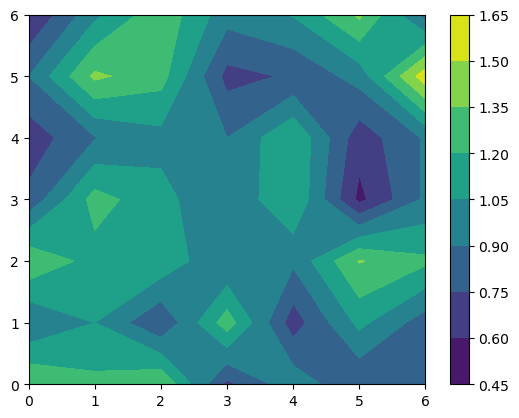

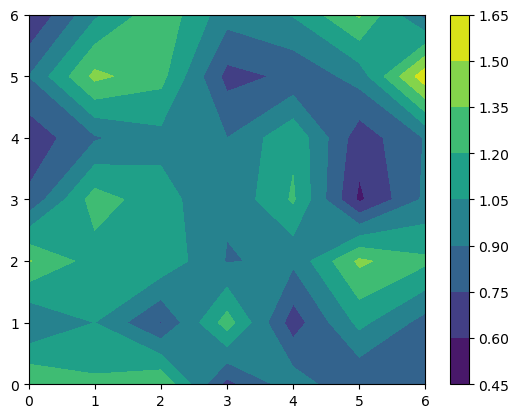

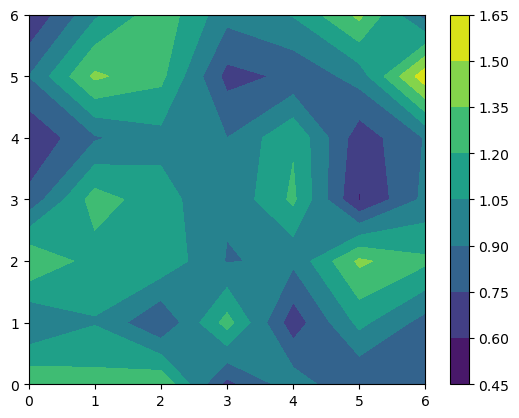

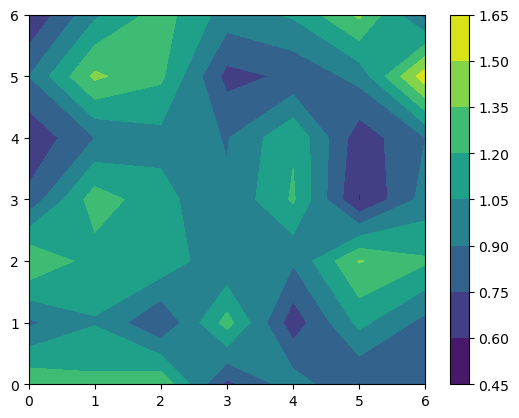

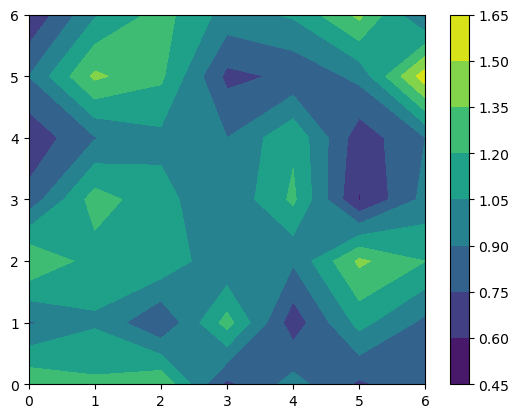

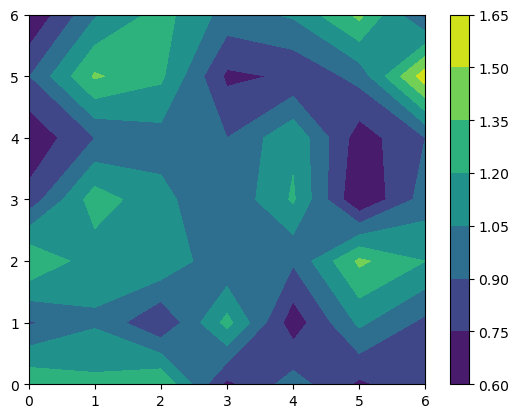

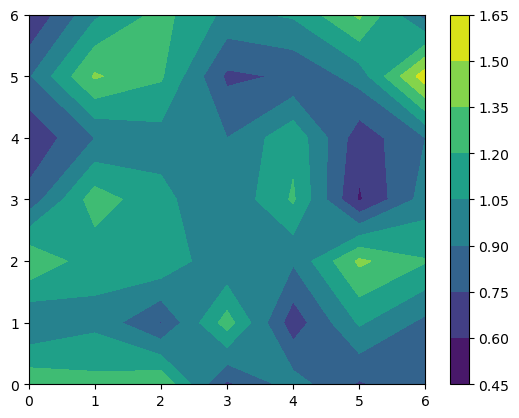

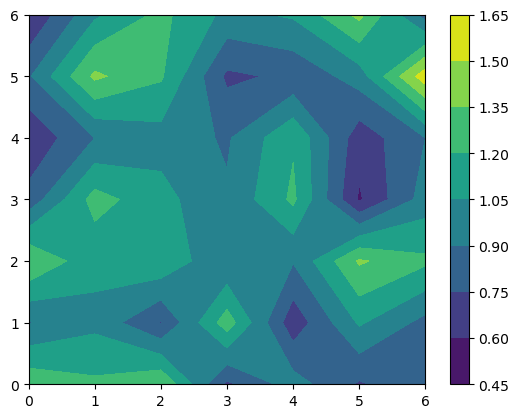

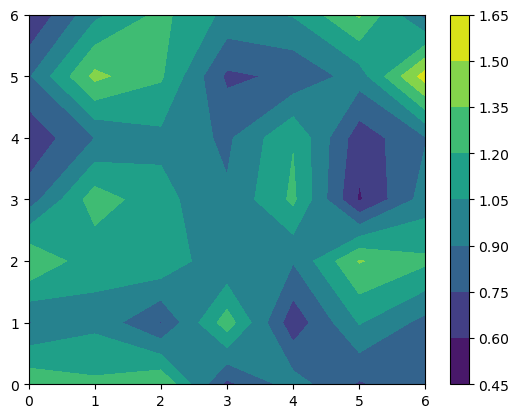

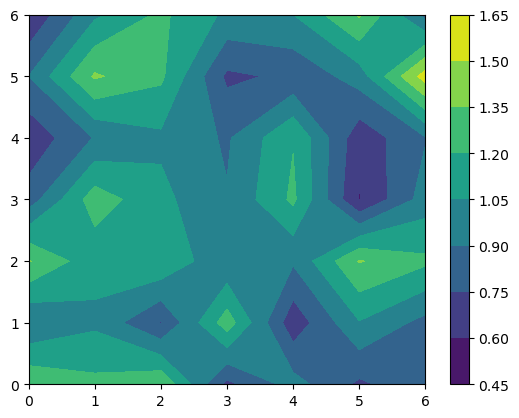

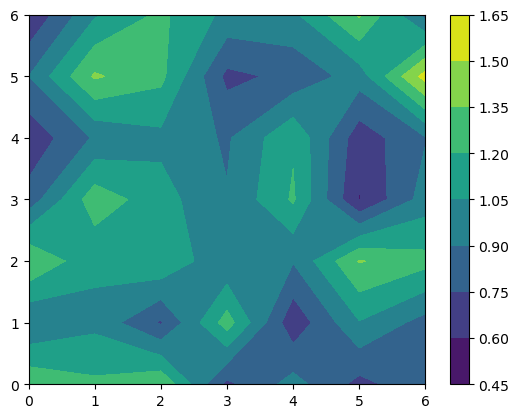

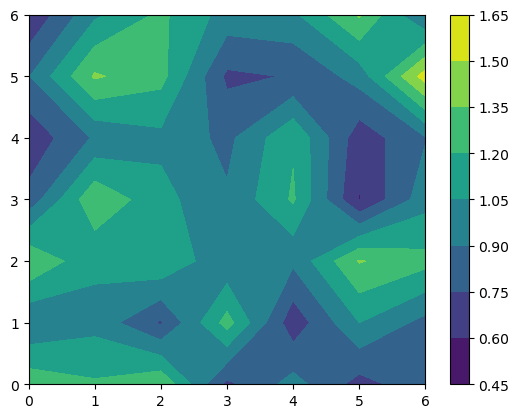

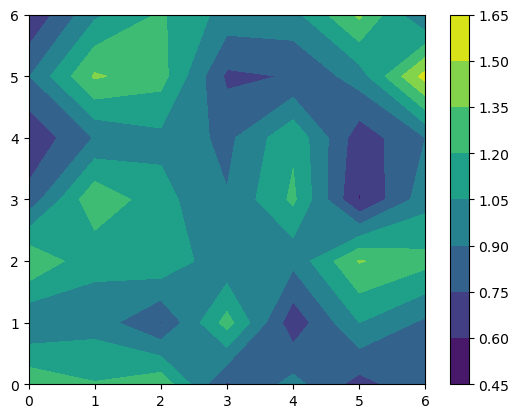

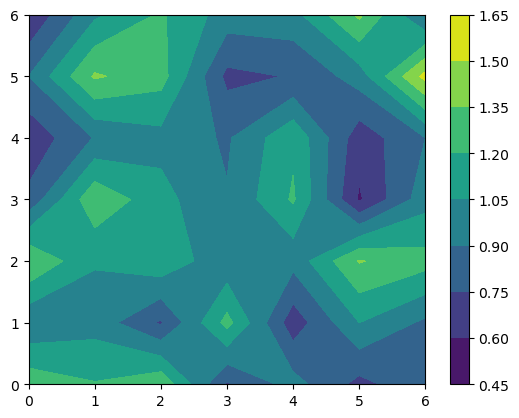

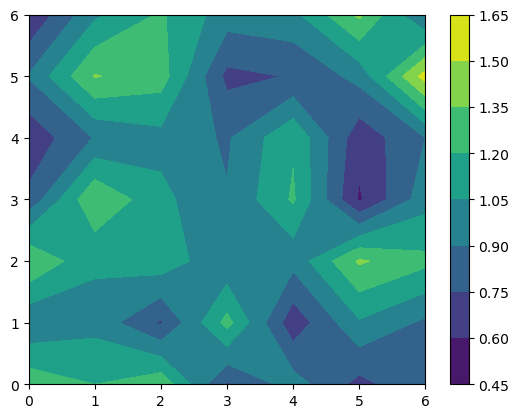

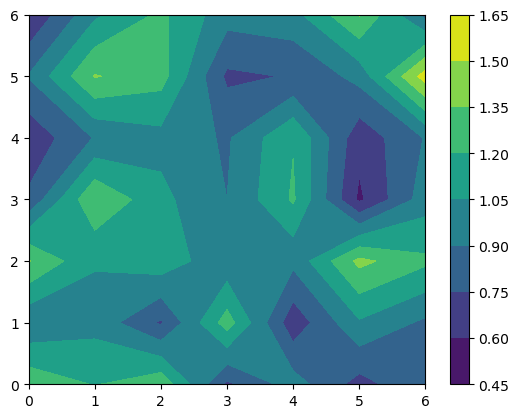

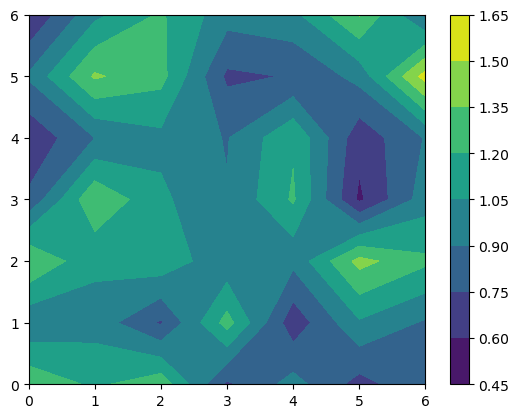

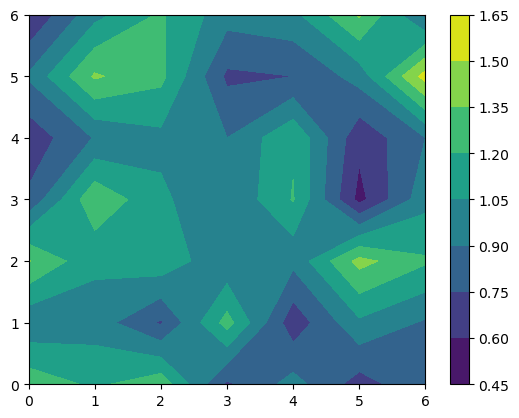

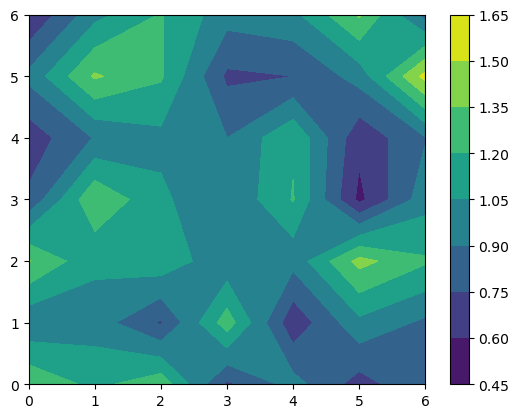

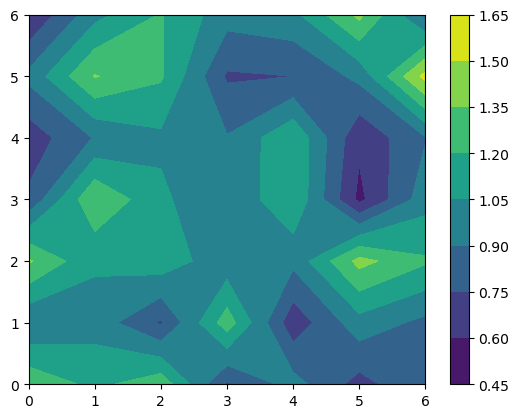

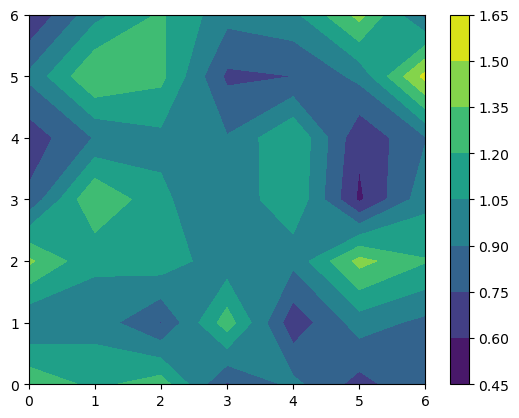

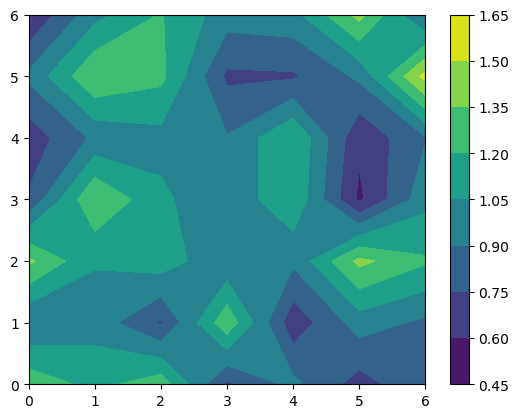

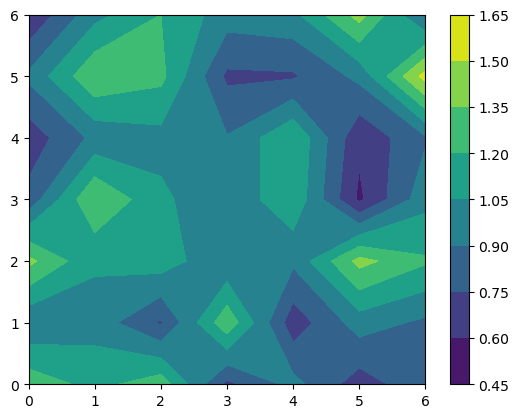

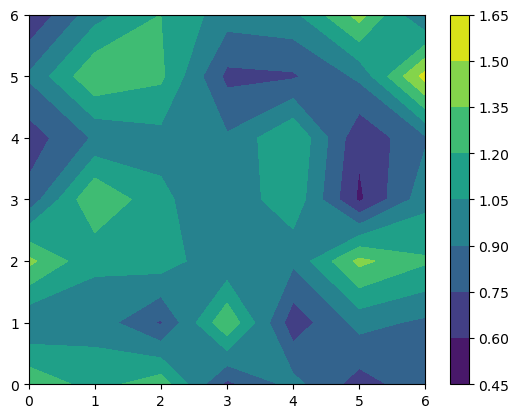

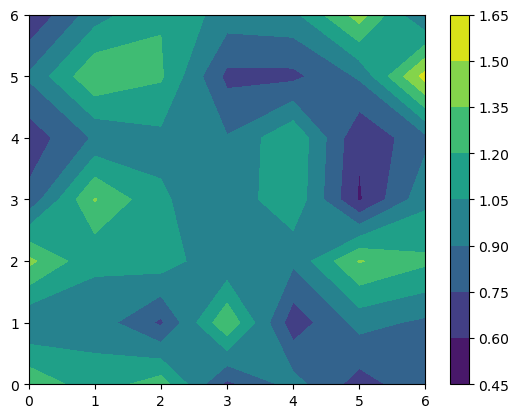

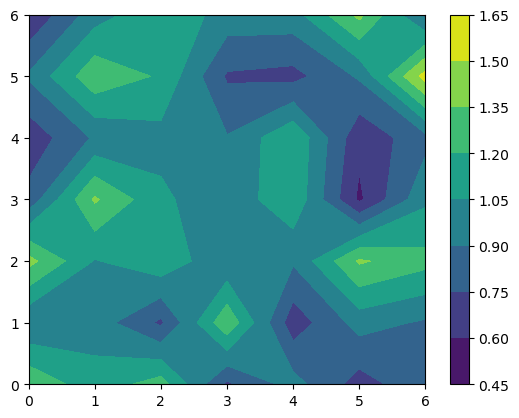

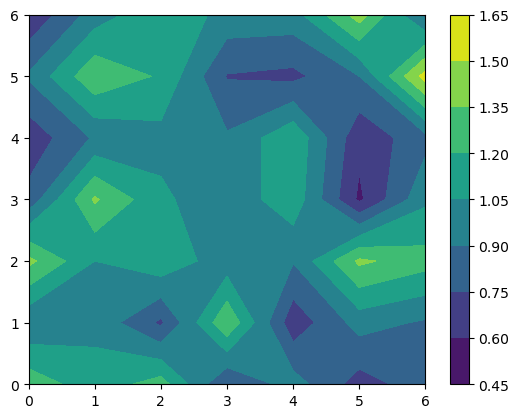

In [57]:
import scipy
import numpy as np 
import matplotlib.pyplot as plt
from scipy.io import loadmat

data = loadmat("150805.mat")
codes_5=data['Event'][0]['vodr'][0]['codes'][0][0][:,9:16]
s_mgs_13=data['spike'][14][1]['vodr'][0][0] 
Map = np.zeros((7,7,1902)) 
Map_2 = np.zeros((7,7,100)) 

for k in range(146):
    for l in range(7):
        j = (codes_5[k,l]%10)-1
        i = (np.int32(codes_5[k,l])//np.int32(10)) - 3
        Map[i,j,(l*200)+1:((l+1)*200)] = 1
    column = np.where(s_mgs_13[k]==1)[0]
    for z in range(len(column)):
        if(column[z]>100):
            Map_2[:,:,:] = Map_2[:,:,:] + Map[:,:,(column[z]-101):column[z]-1]/100
    Map = np.zeros((7,7,1902))
for t in range(100):
    plt.contourf(Map_2[:,:,t])
    plt.colorbar()
    plt.show()